 ###  <font color='Green'>**E-commerce — Выявление профилей потребления интернет-магазина товаров для дома и быта «Пока все ещё тут»**<br><b>
Проект является выпускным курса "Аналитик данных +" от Яндекс-Практикума.
    
    
    
**Материалы:**
* [Презентация]: https://disk.yandex.ru/i/5071h60vBUZUwA
* [Дашборд]: https://public.tableau.com/app/profile/alexander2244/viz/Ecom_/Dashboard1 (дашборд простой сделан по задаче и также принимался, лучше посмотреть другие мои дашборды для понимания навыков).

<p style="text-align:center;"> И понеслось </p>

<img src='https://avatars.dzeninfra.ru/get-zen_doc/3638148/pub_5ef82894be099352eca805db_5ef82d458df0043de5971b81/scale_2400' alt='Подпись над рисунком' width=500, heigth=350>


**Описание проекта**

E-commerce 📦 

Интернет-магазин товаров для дома «Пока все ещё тут» хочет проанализировать свои данные. Нам нужно помочь магазину стать лучше, а клиентам — обустроить дом своей мечты.

Наши задачи: сегментировать покупателей по профилю потребления для осуществления рекламных рассылок, проанализизировать товарный ассортимент, выделить категории товаров и проанализировать их популярность и сезонность.

Т.е. составить подробные рекомендации заказчику по сегментам покупателей:
В каком сегменте покупатели покупают часто, много и дорогой товар, а на какой сегмент, возможно, не стоит тратить время
и деньги проводя рассылку.
Клиентам какого сегмента, когда и какие категории товара рассылать в рекламных предложениях (товар у нас не разбит на
категории, мы сами создаем категории и разносим по ним товар). Как и для какого кластера можно попытаться увеличить
количество продаваемого товара, повысить возвращаемость покупателей и т.д.

«Пока все ещё тут» — мы создаём уют!

В наличии у нас есть данные за период 2018.10.01- 2020.01.31

**Цели исследования:**
1. При предобработке данных разбить все товары на категории (5-7шт.)

2. EDA Провести исследовательский анализ данных:
- Корелляции и анализ количественных признаков, фильтр выбросов
- Топ 10 наимерований новара
- Сумма продаж по месяцам
- Кол-во заказов по месяцам
- Доли категорий
- Сумма продаж по категориям
- Сумма продаж по категориям по месяцам

3. Сегментация/кластеризация покупателей по профиля потребления:
- Стандартизация, Дендограмма, определить оптимальное кол-во кластеров
- Сегментация/кластеризация методом K-Means покупателей по матрице X для каждого пользователя = [Кол-во товара среднее 'quantity', Цена товара средняя 'price', Сумма заказа средняя, Количество заказов покупателя]
- Графики распеределения всех признаков по кластерам

4. Проверка гипотез:
    * 1. Проверка гипотез на различие между средними чеками кластеров (все комбинации)
    * 2. Проверка гипотез на различие между средней ценой 1 товара по кластерам (все комбинации)
    * 3. Проверка гипотез на различие между средним Кол-вом товаров в заказе по кластерам (все комбинации)

**Ход исследования:**

Моё исследование пройдет в несколько этапов:
* Загружу данные, файл '/datasets/ecom_dataset_upd.csv'
* Обзор данных, посмотрю их качество
* Предобработка данных (проверка типов данных, проверка на пропуски и их заполнение или удаление, проверка категориальных значений, проверка на дубликаты полные и неявные, проверка на аномальные значения)
* Расчеты и добавление новых столбцов-результатов в таблицы
* Проведение анализа по целям исследования
* Напишу общий вывод
* По итогам исследования подготовлю презентацию в формате pdf, прикреплю ссылку на файл в проекте.

### **Описание данных**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока
все ещё тут».

Колонки в '/datasets/ecom_dataset_upd.csv':

- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

## 1. Загрузка данных

### 1.1 Импортируем библиотеки, откроем csv

In [3]:
import pandas as pd
# отключим ограничение печатаемой длины ячейки
pd.set_option('max_colwidth', None)

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# magic function, отображает фигуру в блокноте рядом с кодом:
%matplotlib inline
# matplotlib/plot, графики с высоким разрешением:
%config InlineBackend.figure_format='retina'

import seaborn as sns
# применяем стиль whitegrid
sns.set_style('whitegrid')

# стандартизация
from sklearn.preprocessing import StandardScaler 
# кластеризщация:
from sklearn.cluster import KMeans

#from scipy import stats as st
from scipy.stats import mannwhitneyu
#from statsmodels.stats.power import TTestIndPower

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import shapiro

# для графиков попарных сочетаний признаков с разметкой по кластерам
import itertools

# уберем предупреждения
import warnings
warnings.filterwarnings("ignore")

In [4]:
# откроем файл *.csv
try:
    try:
        df = pd.read_csv('ecom_dataset_upd.csv')
    except:
        df = pd.read_csv('/datasets/ecom_dataset_upd.csv')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_24 final ecom/ecom_dataset_upd.csv')

### 1.2 Основная информация о дф, краткие хар-ки

In [3]:
# выведем инфо о дф с типами данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Пропусков нет

In [4]:
def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape', df.shape, ', example:')
    display(df.dropna().sample(1).T) # удал пропуски, возвращаем случайную строку, транспонируем
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number): # если содержит числовые значения 
            print(f"{col} — {n} values. MIN {df[col].min():_.0f}, AVG: {df[col].mean():_.1f}, MAX: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. MIN {df[col].dropna().min()}, MAX: {df[col].dropna().max()}")

In [5]:
# исследуем датасет
lookup(df)

Dataset shape (7474, 6) , example:


,2650
date,2019040410
customer_id,eeec96e6-88f0-4d11-a100-0b3971840412
order_id,14614
product,Пеларгония зональная диам. 12 см коралловая полумахровая
quantity,1
price,188.0


date — 3126 values. MIN 2_018_100_100, AVG: 2_018_912_614.0, MAX: 2_020_013_115
customer_id — 2451 values. MIN 000d6849-084e-4d9f-ac03-37174eaf60c4, MAX: ffe82299-3f5b-4214-87fe-3d36ecccfac3
order_id — 3521 values. MIN 12_624, AVG: 49_449.9, MAX: 112_789
product — 2343 values. MIN Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759, MAX: томата (помидор) сорт Бычье Сердце №14
quantity — 49 values. MIN 1, AVG: 2.4, MAX: 1_000
price — 407 values. MIN 9, AVG: 478.7, MAX: 14_917


По категориальным min max понятно что в некоторых кириллических словах есть латинские буквы, например, MIN "Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759" - "Т" - латинская

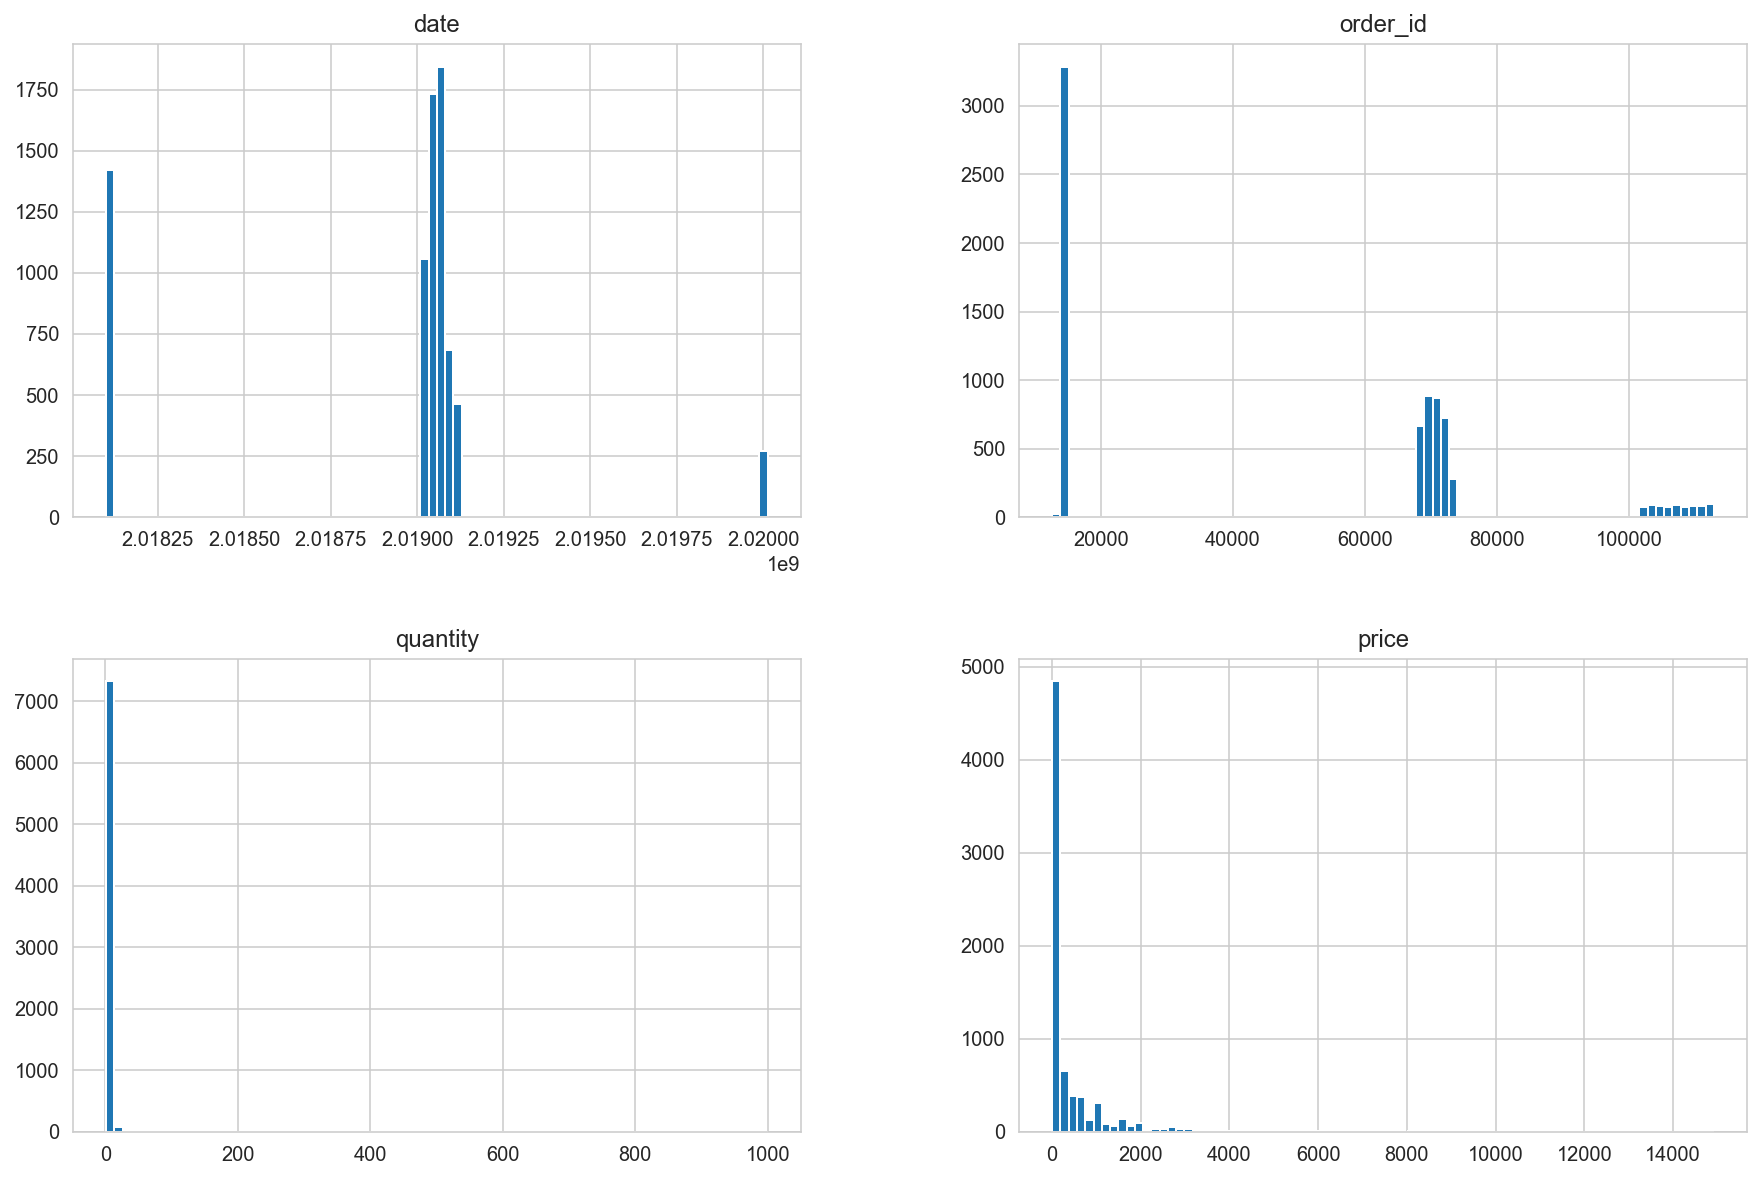

In [6]:
# бегло посмотрим распределение количественных признаков
df.hist(bins=80, figsize = (15,10))
plt.show()

**Краткий вывод:**
* Надо преобразовать типы данных: date в дату, проверить можно ли price преобразовать в int.
* Надо учесть в предобработке что в категориальных значениямх по min max понятно что в некоторых кириллических словах есть латинские буквы, например, MIN "Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759" - "Т" - латинская и не кириллическая.
* По распределениям видно пики активности в определенные даты (видимо в какой то сезон люди делаю заказы с большим кол-вом товаров), по кол-ву товаров в заказе подавляющее кол-во по 1шт но есть и вплоть до 1000, цены в магазине небольшие (распределение скошено влево от 0).

## 2. Предобработка данных

In [7]:
# создадим копию дф, и будем работать с копией
df1 = df.copy()

### 2.1 Преобразуем типы данных

In [8]:
# преобразуем тип данных date в дату (на конце - час)
# 2019061409
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d%H')

In [9]:
# проверить можно ли price преобразовать в int?
integer = 0
fl = 0
for i in range(len(df1)):
    if int(df1['price'][i]) == df1['price'][i]:
        integer += 1
    else:
        fl += 1
print(integer, fl)        

7427 47


price нельзя преобразовать в int, у некоторых значений все таки есть дробная часть

### 2.2 Проверка на дубликаты и качество данных


#Неявные дубликаты.
При одинаковых номерах заказов есть одинаковые кастомеры. Плохая выгрузка из какой то программы(может 1С) и соединенная. Определить лишний и удалить. см. дубликаты без учета дат.

In [10]:
# проверим явные дубликаты всех строк
display(df1.duplicated().sum())

0

In [11]:
# проверим на дубликаты столбцы 
dub = (df1[['customer_id','order_id','product']].duplicated().sum())
print(f'Дубликатов {dub} шт, {round(dub / len(df1) *100, 1)}%')

Дубликатов 1886 шт, 25.2%


In [12]:
# посмотрим дубликаты по полям идентификатор покупателя, идентификатор заказа, наименование товара: 
(df1[df1.duplicated(subset=['customer_id', 'order_id', 'product'], keep=False)]
 .sort_values(by='product', ascending=False)
 .head(6)
)

,date,customer_id,order_id,product,quantity,price
5758,2019-07-09 17:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,томата (помидор) Юсуповский Узбекский №86 сорт индетерминантный позднеспелый красный,1,38.0
5793,2019-07-10 09:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,томата (помидор) Юсуповский Узбекский №86 сорт индетерминантный позднеспелый красный,1,38.0
5757,2019-07-09 17:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,томата (помидор) Полосатый шоколад №65 сорт индетерминантный среднеспелый черный,1,38.0
5792,2019-07-10 09:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,томата (помидор) Полосатый шоколад №65 сорт индетерминантный среднеспелый черный,1,38.0
5791,2019-07-10 09:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,томата (помидор) Минусинские № 94 сорт индетерминантный среднеспелый розовый,1,38.0
5756,2019-07-09 17:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,томата (помидор) Минусинские № 94 сорт индетерминантный среднеспелый розовый,1,38.0


In [13]:
# при нескольких датах и при одном номере заказа и покупателе
# кол-во позиций отличается?
(df1[df1['order_id'] == 14897]
 .groupby(['date','customer_id', 'order_id'], as_index=False)[['price']].count()
 .rename(columns={'price':'prod_cnt'})
)

,date,customer_id,order_id,prod_cnt
0,2019-07-09 17:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,26
1,2019-07-10 09:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,25
2,2019-07-10 23:00:00,42d3cb27-6519-4627-9b4a-5aa8ee600203,14897,12


У нас есть дубликаты например: 1 покупатель сделал заказ, номер заказа один но даты разные (отличие в 16ч), продукты одинаковые и не по 2шт а по 1+1, так не может быть. Могут быть даже не 2 разные даты а 3, а может и больше есть, и причем бывает разное кол-во позиций в заказе, а бывает одинаковое. Такое ощущение что была выгрузка данных (несколько таблиц) из какой то программы типа 1С но в разные часовые пояса и потом эти датасеты объединили в 1 что дало нам дубликаты одних и тех же покупателей и тех же заказов.

In [14]:
# сгруппируем по ['date','customer_id', 'order_id']
# и отфильтруем только те строки где макс кол-во поз в заказе
r= (df1#[(df1['order_id'] == 14897) | (df1['order_id'] == 14833)]
    .groupby(['date','customer_id', 'order_id'], as_index=False)[['price']].count()
    .rename(columns={'price':'prod_cnt'})
        # prod_cnt сортируем группу ['customer_id', 'order_id'] по max prod_cnt
        .groupby(['customer_id', 'order_id'], as_index=False)
        .apply(lambda group: group.sort_values(by='prod_cnt', ascending=False))
)

# выбираеем первую строчку с макс prod_cnt
r = (r[r['date'] == r.groupby(['customer_id', 'order_id'])['date'].transform('first')]
     .reset_index(drop=True)
    )

In [15]:
# отфильтруем df1 от дубликатов
df2 = df1.merge(r[['date', 'customer_id', 'order_id']], on=['date', 'customer_id', 'order_id'], how='inner')

In [16]:
print(f'''Доля оставшегося датафрейма без дубликатов: {round(len(df2) / len(df) *100, 1)}%,
Кол-во строчек: {len(df2)}''')

Доля оставшегося датафрейма без дубликатов: 74.6%,
Кол-во строчек: 5577


In [17]:
# Проверим данные на принадлежность одного заказа двум покупателям
wrong_order = (df2.groupby(['order_id', 'customer_id'], as_index=False)[['date']].first()
               .groupby(['order_id'], as_index=False)[['customer_id']].count()
               .sort_values(by='customer_id', ascending=False)
               .query('customer_id > 1')
               )
print('Количество заказов у которых есть > 1 покупателя:', len(wrong_order))

Количество заказов у которых есть > 1 покупателя: 29


In [18]:
wrong_order_cus = (df2.query('order_id in @wrong_order["order_id"]')
                   .sort_values(by=['order_id', 'customer_id'])
                   )
wrong_order_cus.head(6)

,date,customer_id,order_id,product,quantity,price
3829,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,"Однолетнее растение Петуния махровая в кассете 4 шт, Россия",2,82.0
3830,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,"Однолетнее растение Петуния простая в кассете по 4 шт, Россия",1,82.0
3831,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,Петуния махровая рассада однолетних цветов в кассете по 6 шт,1,128.0
3833,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,"Однолетнее растение Петуния махровая в кассете 4 шт, Россия",2,82.0
3834,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,"Однолетнее растение Петуния простая в кассете по 4 шт, Россия",1,82.0
3835,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,Петуния махровая рассада однолетних цветов в кассете по 6 шт,1,128.0


Есть заказы order_id (29шт) у которых есть > 1 покупателя, просмотрев их можно сказать что они идентичные по товарам (дублируют друг друга), у них только отличаются customer_id и date. Давайте отфильтруем дубли:

In [19]:
# выявим customer_id которые нужно чтобы остались
wrong_order_cus_stay = (wrong_order_cus.groupby(['order_id', 'customer_id'], as_index=False)
                       [['date']].first()
                       .groupby(['order_id'], as_index=False)[['customer_id']].first()
                      )
# выявим order_id customer_id которые нужно удалить
# wrong_order_cus_stay['customer_id']
wrong_order_cus_del = wrong_order_cus.query('customer_id not in @wrong_order_cus_stay["customer_id"]')
wrong_order_cus_del[['order_id', 'customer_id']]

# отфильтруем из df2 комбинации для удаления
print('Размер датафрейма до фильтрации customer_id:', len(df2))
df2 = (df2[~df2[['order_id', 'customer_id']]
           .isin(wrong_order_cus_del[['order_id', 'customer_id']])
           .any(axis=1)] # возвращает True/False по строке
      )
print('Размер датафрейма после фильтрации customer_id:', len(df2))

Размер датафрейма до фильтрации customer_id: 5577
Размер датафрейма после фильтрации customer_id: 5542


### 2.3 Добавление новых столбцов-результатов

#### 2.3.1 Сумма заказа, Количество заказов покупателя

In [20]:
# посчитаем сумму кажой позиции в проданном кол-ве
df2['price_all_q'] = df2['quantity'] * df2['price']

# посчитаем сумму заказов
# суммируем 'price_all_q' для каждой группы
df2['order_price'] = df2.groupby(['date', 'customer_id', 'order_id'])['price_all_q'].transform('sum')

In [21]:
# посчитаем Количество заказов покупателя
df2['order_count'] = df2.groupby('customer_id')[['order_id']].transform('nunique')

#### 2.3.2 Месяц продажи

In [22]:
# дату округлим до месяца
df2['month'] = df2['date'].astype('datetime64[M]')

#### 2.3.3 Категории товаров
Разбить все товары на категории (5-7шт.)

In [23]:
# посмотрим уникальное кол-во наименования новаторов, и их кол-во
print(f'Уникальное кол-во наименования новаторов: {df2["product"].nunique()}')
df2['product'].value_counts().head()

Уникальное кол-во наименования новаторов: 2340


Пеларгония розебудная Red Pandora укорененный черенок      66
Пеларгония розебудная Prins Nikolai укорененный черенок    56
Пеларгония зональная диам. 12 см сиреневый полумахровый    53
Сумка-тележка 2-х колесная Gimi Argo синяя                 47
Пеларгония розебудная Mary укорененный черенок             40
Name: product, dtype: int64

In [24]:
# создадим словарь с категориями и ключевыми словами
cat = {
    'Рассада': ['Рассада', 'Рассада', 'рассада'],
    
    'Сумки, Тележки': ['Тележка', 'тележка', 'Сумка'],
            
    'Муляжи': ['Муляж'],
    
    'Уборка и мойка' : ['Тряпкодержатель', 'тряп', 'чистки', 'стирки',
                'Швабра', 'швабр', 'Ёрш', 'ерш', 'гладил', 'глажен',
                'мойк', 'мыть', 'Щетка', 'щетка', 'Салфетка', 'салфеток',
                'Гель', 'Мыло', 'Средство', 'средство', 'стир', 'латекс',
                'Ведро', 'Пена', 'Кондиционер', 'посудомоеч', 'мыл',
                'Скребок', 'Совок', 'совок', 'Антинакипин', 'антижир',
                'налет', 'мусор', 'Перчатки', 'Гладильная', 'Корзина',
                'Отбеливатель'
               ],
    'Кухонные принадлежности': ['Овощеварка', 'Кувшин', 'Банка', 'Салатник',
                                'кружка', 'Чайник', 'Скатерть', 'Тарелка',
                                'Контейнер', 'Кружка', 'сковорода', 'Нож',
                                'нож', 'Измельчитель', 'Вилка', 'Хлебница',
                                'Сковорода', 'Просеиватель', 'Ложка', 'посуды',
                                'Ящик для хранения', 'Блюдце', 'Терка', 'Блюдо',
                                'банка', 'Миксер', 'ложка', 'Сито', 'Масленка',
                                'Соковыжималка', 'Сотейник', 'фужер', 'бокал',
                                'Миска', 'чай', 'кухон', 'кухн', 'доска',
                                'салфетк', 'Отделитель', 'силикон', 'фарфор',
                                'Ваза', 'Половник', 'Чай', 'ухонно', 'скатерть',
                                'эмалирован', 'кондитер', 'стакан', 'штопор',
                                'Лопатка'
                               ],
    
    'Хозтовары': ['Сушилка', 'Подставка', 'Вешалка',
                  'Таз', 'ехол', 'ванной', 'ванны',
                  'Подкладка', 'Сиденье',  'Коврик',
                  'Стяжка', 'Стяжки', 'Термометр',  'Рукав', 
                  'Подрукавник', 'Бензин', 'Кофр', 'Полки',
                  'Подарочный набор', 'кашпо', 'Искусственная лиана',
                  'Корыто', 'Подкладка', 'Лестница', 'Весы', 'контейнер',
                  'Веник', 'Стремянки', 'Линейка', 'ведра', 'Ковёр', 
                  'Ковер', 'Комод',  'обуви', 'Стремянка', 'Фал',
                  'Полотенце', 'ковер', 'Крепеж', 'Крючок', 'Петля',
                  'сушилка', 'маска', 'скоба', 'Ключница', 'Орехоколка',
                  'Пьезозажигалка', 'Подголовник', 'Покрывало', 'Вантуз',
                  'Сверло', 'пуф', 'оробка' , 'паста', 'ламп', 'Обувница',
                  'прищепк', 'Уголок', 'Термос', 'Тортница', 'ручк',
                  'Насадка', 'мебель', 'совком', 'уголь', 'инструмент',
                  'пружин', 'Искусственный', 'Корзинка', 'стеллаж',
                  'Лоток', 'халат', 'рамка',
                  'Стеклян', 'стеклян',  'деревянн', 'чугун', 'хром', ##
                  'стал', 'алюм', 'нержаве', 'оцинкован', 'метал', ##
                  'пластмасс', 'полиэстер', 'микрофибр', 'полипропилен',
                  'полимер', 'сварка', ##
                  'белья', '100%', 'Набор', 'хозяйств', ##
                  'для', ' мл', ' c ', 'Вт' ##
                 ],
    
    'Растения, семена': ['растение', 'черенок', 'помидор', 'дерево',#
                 'цветов', 'Цветок', 'цветок', 'луковиц',#
                 'Пеларгония', 'пеларгония',
                 'Калибрахоа', 'Петуния', 
                 'Бакопа', 'Фуксия', 'Декабрист', 'Хлорофитум',
                 'Колокольчик', 'Роза','Вербена', 'Арбуз', 'Дыня',
                 'горшке', 'Тимьян', 'Базилик', 'Мята',
                 'Укроп', 'Настурция', 'Вербейник', 'комнатная',
                 'Гвоздика', 'Петрушка', 'Вербейник', 'Настурция',
                 'Укроп', 'Примула', 'Клубника', 'Календула',
                 'Космея', 'Алиссум', 'Тюльпан', 'Кипарисовик',
                 'Цинния', 'Осина', 'Георгина', 'Морковь', 'Калла',
                 'горшка', 'сорт', 'комнат', 'горшок 9 л', #
                 '12 см', # везде растения, кроме позиций проверяющихся выше
                 'h-',  # везде растения, кроме позиций проверяющихся выше
                 '1 л',  # везде растения, кроме позиций проверяющихся выше
                 'объем 0,5 л',  # везде растения, кроме позиций проверяющихся выше
                 '0,5 л', '0,75 л',  # везде растения, кроме позиций проверяющихся выше
                 'd-', # везде растения, кроме позиций проверяющихся выше
                 'в кассете', # везде растения, кроме позиций проверяющихся выше
                 'в упаковке', # везде растения, кроме позиций проверяющихся выше
                 '10,0 г', '1 г', '0,5 г', '0,3 г', '0,1 г', '0,04 г', '0,02 г', 
                ]
}

In [25]:
def cat_find(product, cat_dict):
    '''Функция для определения категории на основе вхождения слов из словаря'''
    for category, keywords in cat_dict.items():
        for keyword in keywords:
            if keyword in product:
                return category
    return 'Другие товары'

In [26]:
# присвоим товару - Категорию
df2['category'] = df2['product'].apply(cat_find, cat_dict=cat)

In [27]:
# проверка количества категорий
cat_count = pd.DataFrame(df2['category'].value_counts())
cat_count['share_%'] = round(cat_count['category'] / cat_count['category'].sum() * 100, 1)
display(cat_count)

# смотрим популярные значения в категории "Не определено"
# для пополнения словаря
df2.query('category == "Другие товары"')[['product']].value_counts().head(40)

,category,share_%
"Растения, семена",2095,37.8
Хозтовары,1293,23.3
Рассада,659,11.9
Кухонные принадлежности,465,8.4
Уборка и мойка,463,8.4
"Сумки, Тележки",381,6.9
Муляжи,186,3.4


Series([], dtype: int64)

In [28]:
# # проверка при учете каких символов в какие строки они входят
# for value in df2[df2['category'] == "Другие товары"]['product']:
#     if 'см' in value:
#         print(value)

In [29]:
# # соединяем все слова, определяем наиболее популярные в оставщейся категории
# pd.Series(' '.join(df2[df2['category'] == "Другие товары"]['product'])
#           .split() # разделяем на отдельные слова
#           ).value_counts().head(20)

In [30]:
# # проверка при учете каких символов в какие строки они входят
# for value in df['product']:
#     if '10,0 г' in value:
#         print(value)

**Выводы по предобработке:**
* Преобразовал тип данных 'date' в дату
* Выявлены дубликаты по полям ['customer_id', 'order_id', 'product']. Доля оставшегося датафрейма без дубликатов: 74.6%. Возможно была выгрузка данных (несколько таблиц из разных источников типа 1С) но например в разные часовые пояса и потом эти датасеты объединили в 1 что дало нам дубликаты одних и тех же покупателей и тех же заказов.
* Добавлены новые столбцы: Сумма заказа, Количество заказов покупателя, Месяц, Категория товара!

## 3. EDA - исследовательский анализ данных

### 3.1 Корелляции и анализ количественных признаков, фильтр выбросов

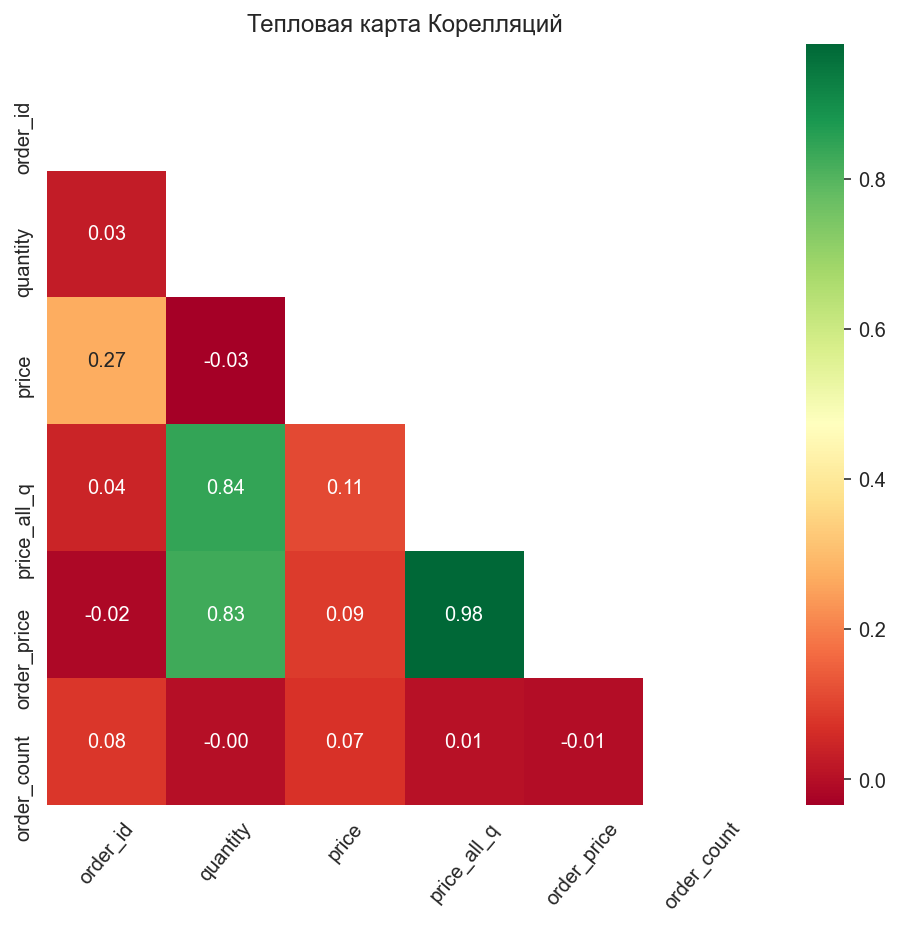

In [31]:
# посмотрим корелляции тепловой картой всего дф числовых значений
plt.figure(figsize=(8,7))
sns.heatmap(df2.corr(), annot=True, cmap='RdYlGn', fmt='.2f',
            mask=np.triu(df2.corr()))
plt.xticks(rotation=50)
plt.title('Тепловая карта Корелляций')
plt.show()

* Есть логическая зависимость вычисляемых столбцов: Стоимость заказа всего - Стоимость всех позиций, Стоимость заказа всего - кол-во, Кол-во - стоимость всех позиций. И есть слабая зависимость Цена - номер заказа (видимо заказывать стали более дорогие товары/либо их стоимость растет со временем).

In [32]:
# разделим на датафреймы:
# количественные признаки
df2_quantity = df2[['date',
                    'quantity',
                    'price'
                   ]]
df2_quantity_2 = df2.groupby('order_id')['order_price'].first()
df2_quantity_3 = df2.groupby('customer_id')['order_count'].first()

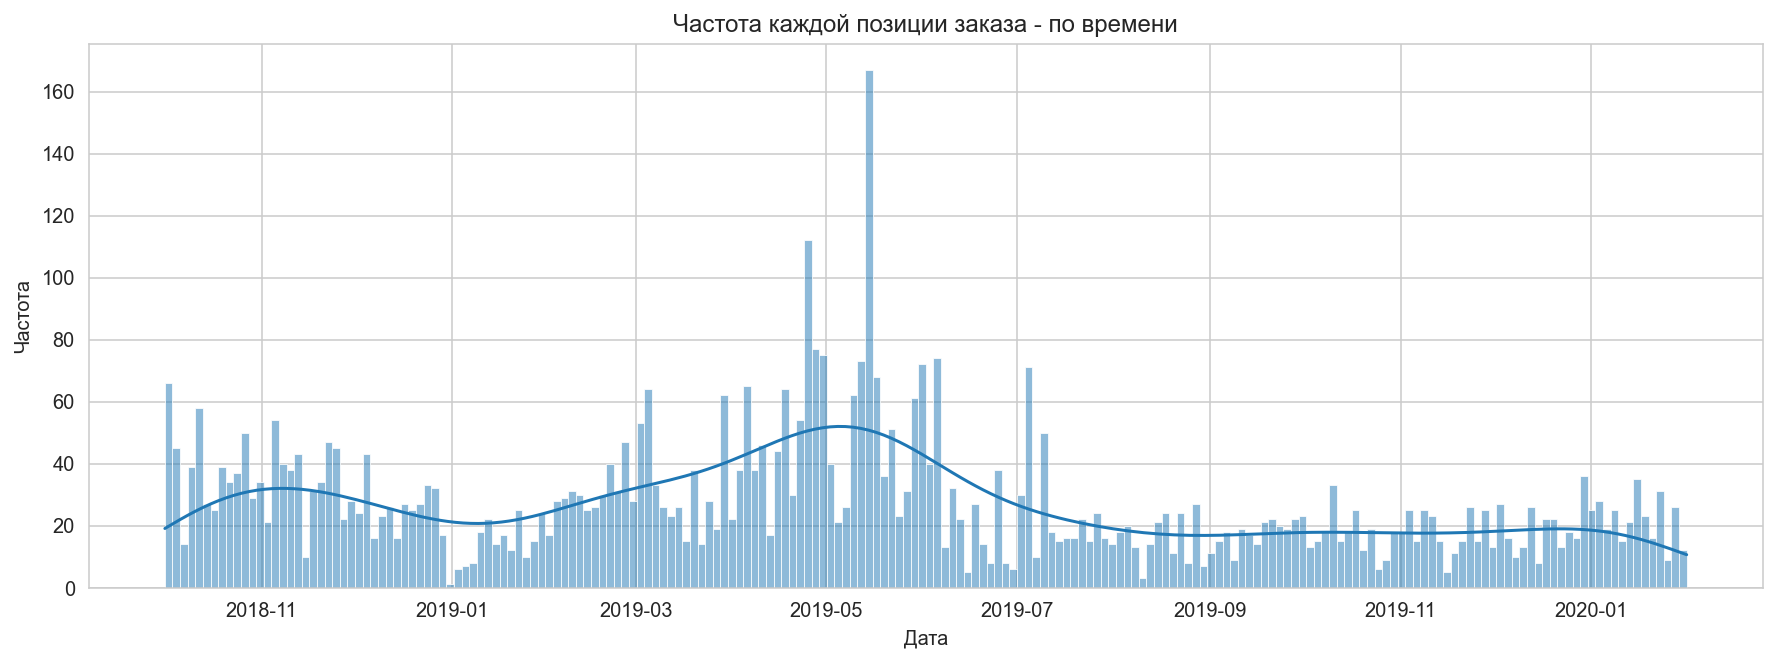

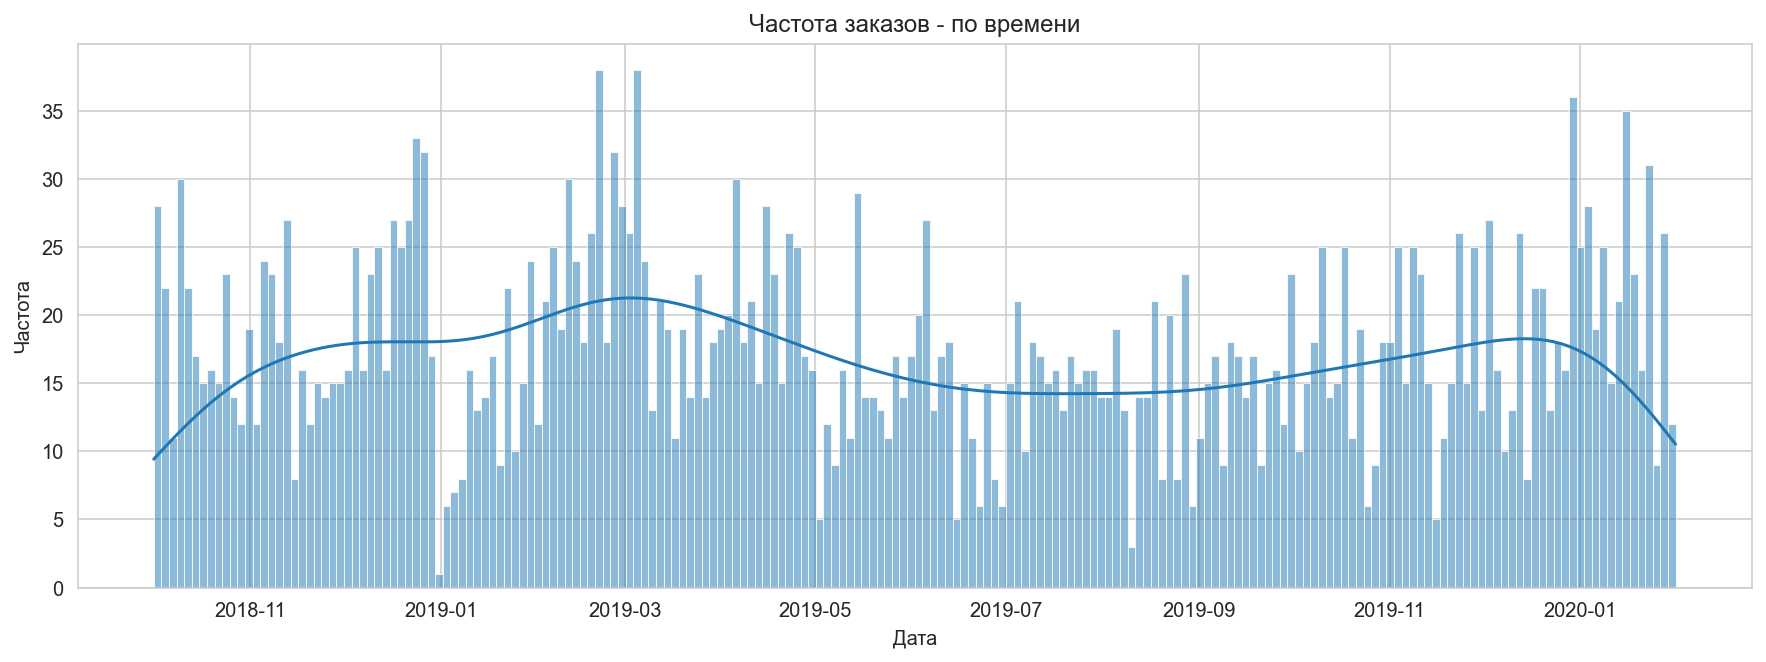

In [33]:
# график заказов каждой позиции по времени
plt.figure(figsize=(15,5))
sns.histplot(df2, x = 'date', bins=200, kde=True)
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.title('Частота каждой позиции заказа - по времени')
plt.show()

# график заказов по времени
plt.figure(figsize=(15,5))
sns.histplot(df2.groupby(['date', 'order_id'])['date'].first(), x = 'date', bins=200, kde=True)
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.title('Частота заказов - по времени')
plt.show()

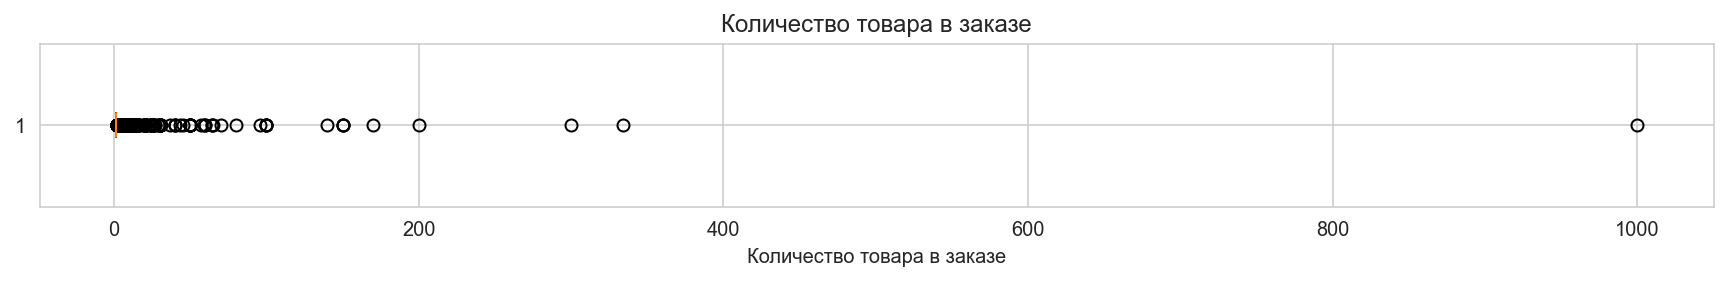

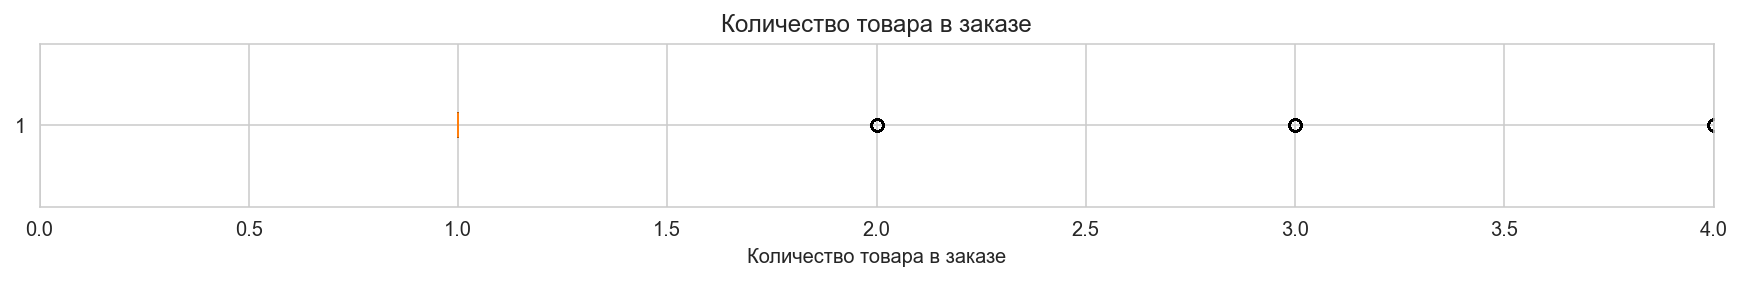

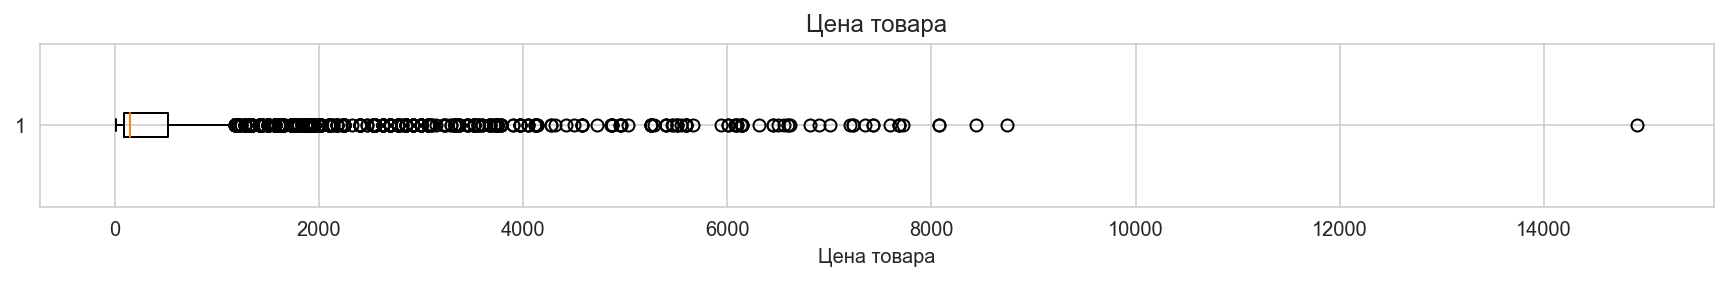

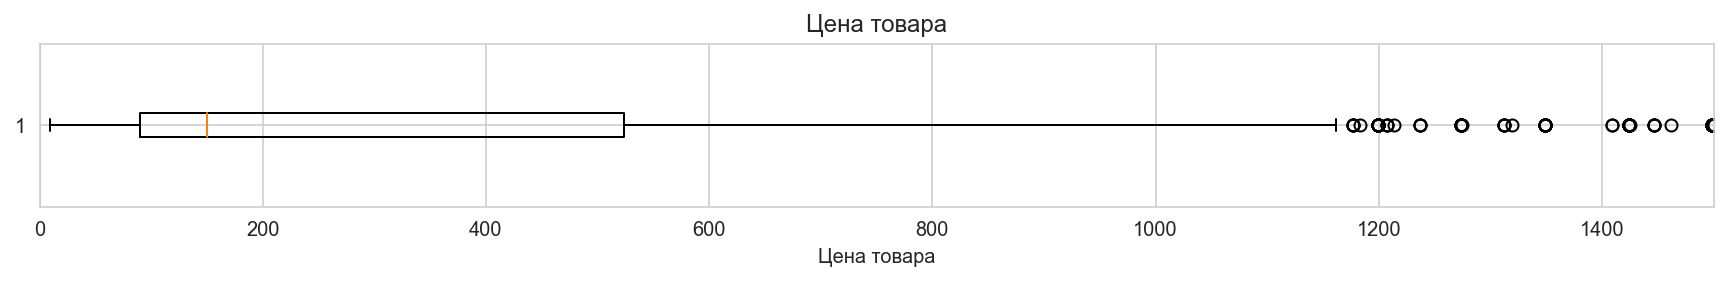

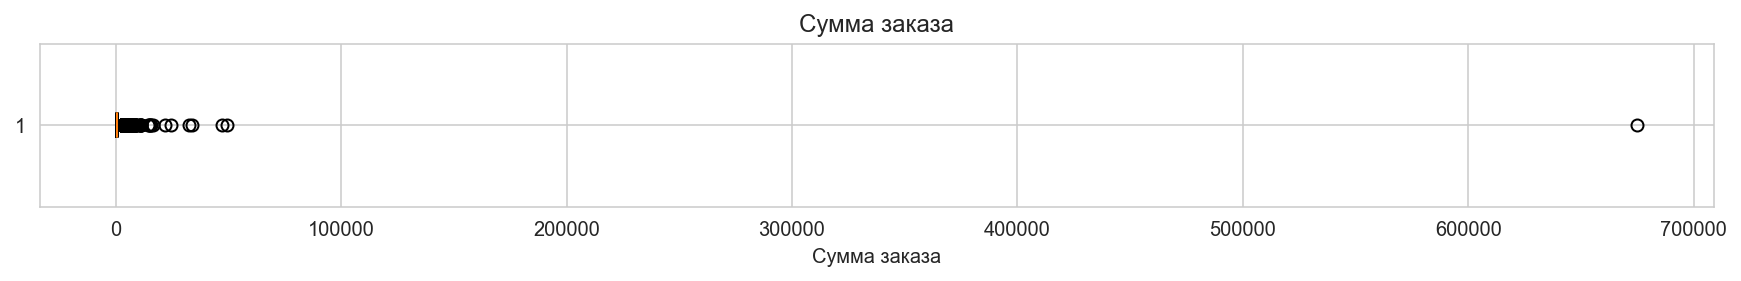

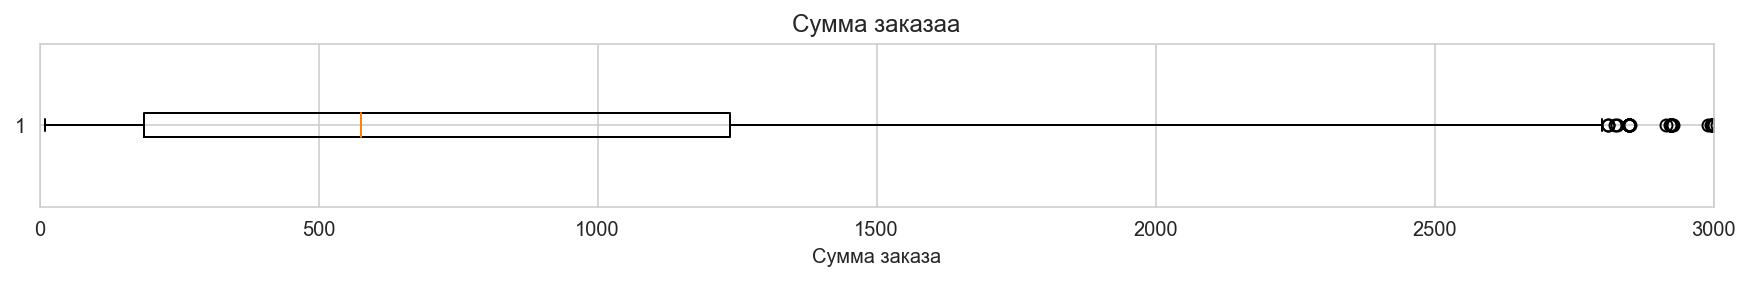

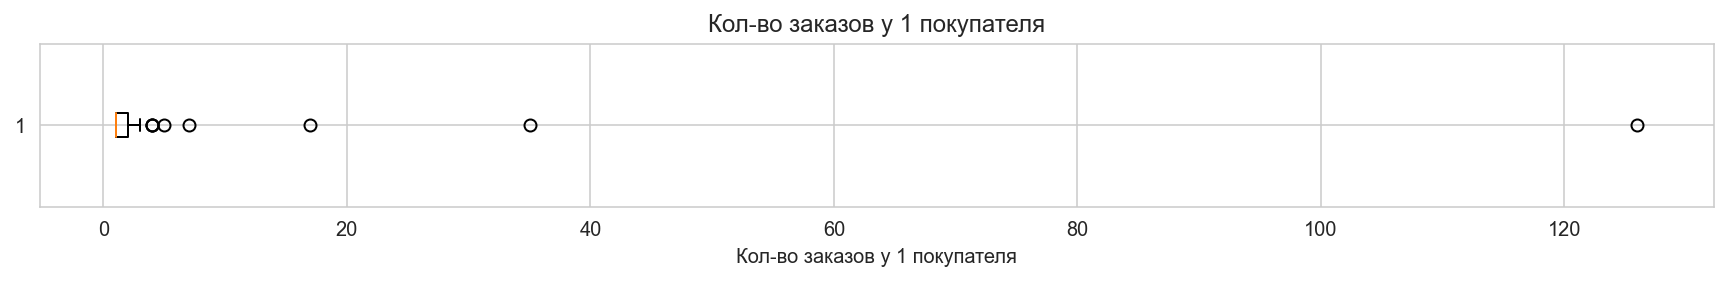

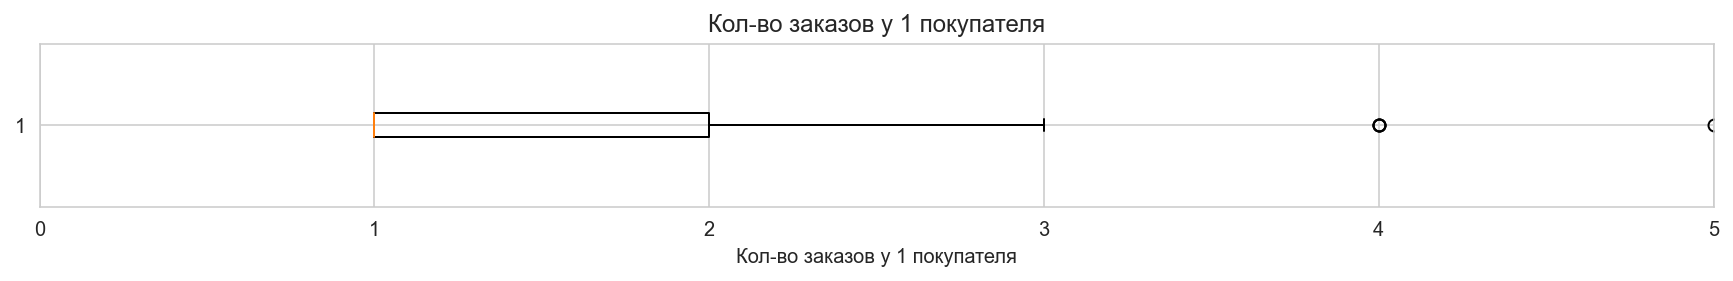

In [34]:
# теперь взглянем на выбросы - построим боксплоты

plt.figure(figsize=(15,1.5))
plt.title('Количество товара в заказе')
plt.boxplot(df2_quantity['quantity'], vert=False)
plt.xlabel('Количество товара в заказе')
plt.show()
plt.figure(figsize=(15,1.5))
plt.title('Количество товара в заказе')
plt.boxplot(df2_quantity['quantity'], vert=False)
plt.xlabel('Количество товара в заказе')
plt.xlim(0,4)
plt.show()

plt.figure(figsize=(15,1.5))
plt.title('Цена товара')
plt.boxplot(df2_quantity['price'], vert=False)
plt.xlabel('Цена товара')
plt.show()
plt.figure(figsize=(15,1.5))
plt.title('Цена товара')
plt.boxplot(df2_quantity['price'], vert=False)
plt.xlabel('Цена товара')
plt.xlim(0,1500)
plt.show()

plt.figure(figsize=(15,1.5))
plt.title('Сумма заказа')
plt.boxplot(df2_quantity_2, vert=False)
plt.xlabel('Сумма заказа')
plt.show()
plt.figure(figsize=(15,1.5))
plt.title('Сумма заказаа')
plt.boxplot(df2_quantity_2, vert=False)
plt.xlabel('Сумма заказа')
plt.xlim(0,3000)
plt.show()

plt.figure(figsize=(15,1.5))
plt.title('Кол-во заказов у 1 покупателя')
plt.boxplot(df2_quantity_3, vert=False)
plt.xlabel('Кол-во заказов у 1 покупателя')
plt.show()
plt.figure(figsize=(15,1.5))
plt.title('Кол-во заказов у 1 покупателя')
plt.boxplot(df2_quantity_3, vert=False)
plt.xlabel('Кол-во заказов у 1 покупателя')
plt.xlim(0,5)
plt.show()

In [35]:
# посмотрим на выброс
df2.query('quantity == 1000')

,date,customer_id,order_id,product,quantity,price,price_all_q,order_price,order_count,month,category
3809,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0,675000.0,675000.0,1,2019-06-01,Хозтовары


Есть серьезный выброс: кто-то купил 1000шт вантузов за 675 000 ед.! это сильно повляет на продажи и среднии значения. Скорее всего это ошибка, не реалистично, отфильтруем этот выброс.

In [36]:
# отфильтруем этот выброс
percentile_99 = np.percentile(df2['quantity'], 99.99) # 628
df2 = df2.query('quantity < @percentile_99')
df2_quantity = df2_quantity.query('quantity < @percentile_99')

In [37]:
# посмотрим хар-ки выборки: среднее, медианное, разброс
pd.concat((
    round(df2_quantity[['quantity', 'price']].describe(), 2),
    round(pd.DataFrame(df2_quantity_2).describe(), 2),
    round(pd.DataFrame(df2_quantity_3).describe(), 2)
), axis=1)

,quantity,price,order_price,order_count
count,5541.00,5541.00,3521.00,2432.00
mean,2.41,530.56,1306.33,1.45
std,9.61,974.38,11545.22,2.69
min,1.00,9.00,9.00,1.00
25%,1.00,90.00,188.00,1.00
50%,1.00,150.00,577.00,1.00
75%,1.00,524.00,1237.00,2.00
max,334.00,14917.00,675000.00,126.00


Анализ всех признаков по отдельности:

* Пиков по датам заказов почти нет, немного есть в марте перед дачным сезоном, есть пик по кол-ву позиций начиная с конца весны с мая, и есть провал в Новый год.
* Среднее кол-во товаров в 1 заказе - 2,6шт, а медианное(наиболее частое без выбросов) - 1шт. Тоесть как правило люди покупают по 1 товару в заказе.
* Средняя цена товара - 530 ед., а медианное(наиболее частое без выбросов) - 150ед.
* Средняя цена заказа - 1306ед., а медианное(наиболее частое без выбросов) - 577ед.
* Средняя кол-во заказов у 1 покупателя - 1,45шт, а медианное(наиболее частое без выбросов) - 1шт. Тоесть большинство покупателей совершает только 1 заказ в этом интернет-магазине, забывают о нем, и не возвращаются. Также стоит учесть, что данные за период 2018.10.01- 2020.01.31 и сезон был только 1, возможно некотоыре вернуться на следующий сезон.
* Есть серьезный выброс где 1000шт ванутосов проданы за 675 000 ед., он отфильтрован.

### 3.2 Топ 10 наимерований новара

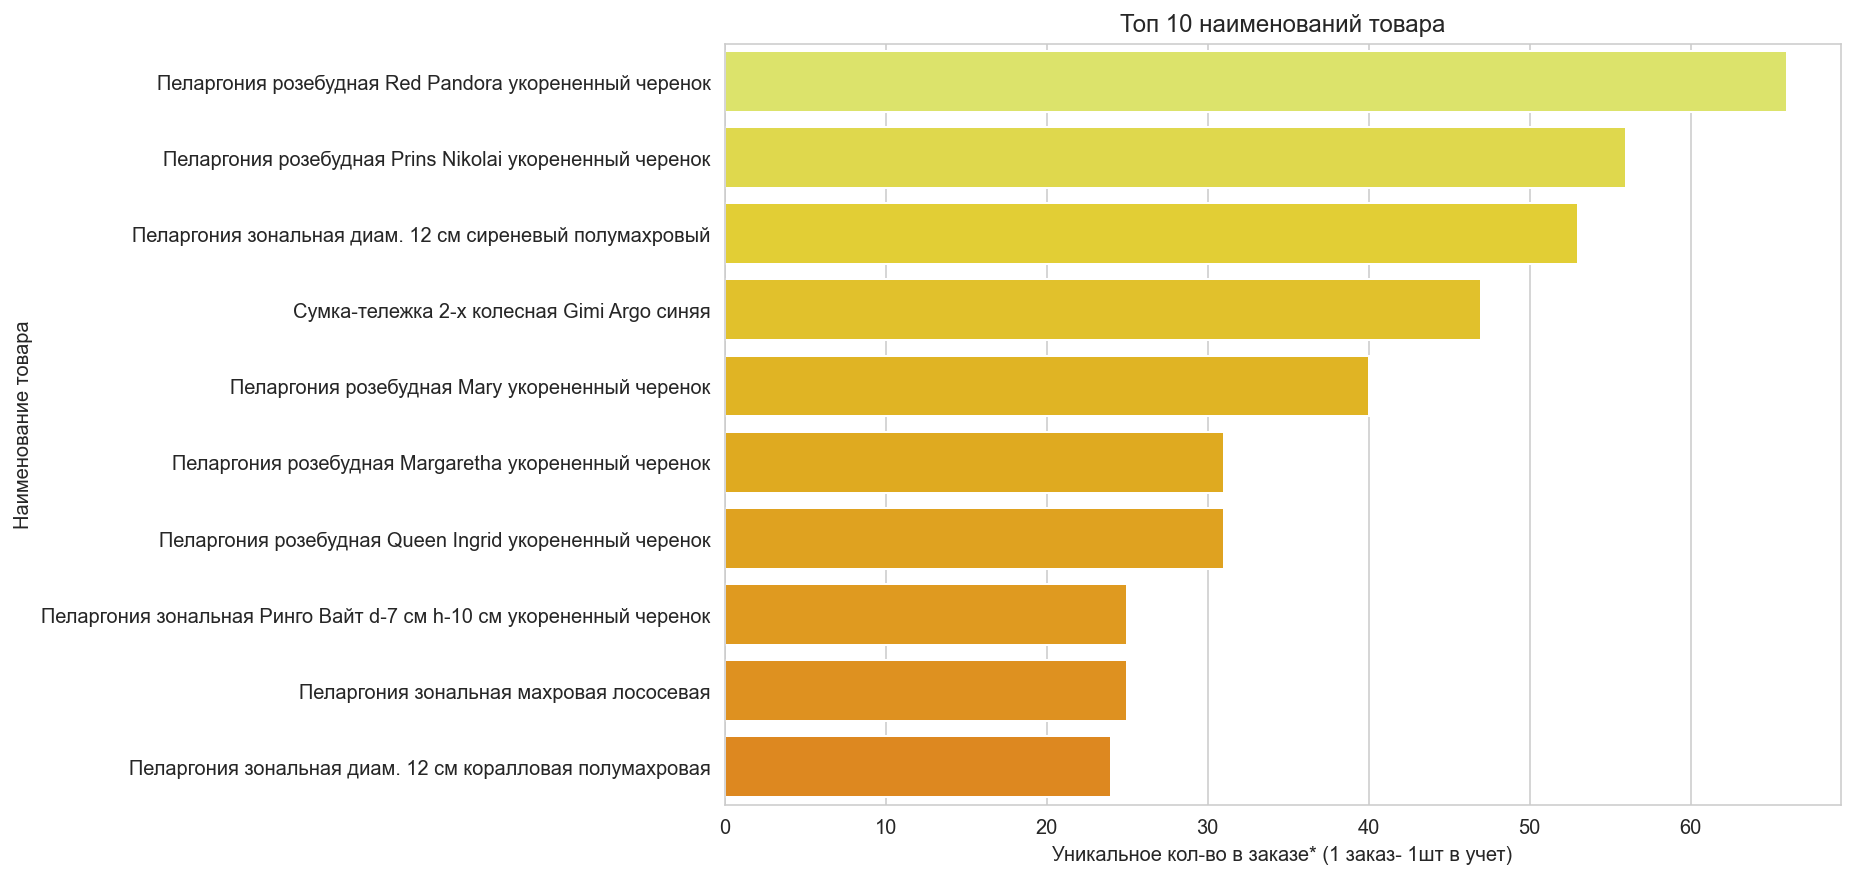

In [38]:
# распределение категориальных признаков
# посмотрим топ 10 наименований товара
product_top = pd.DataFrame(df2['product'].value_counts()).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(data=product_top, x='product', y=product_top.index, palette='Wistia') 
plt.title('Топ 10 наименований товара')
plt.xlabel('Уникальное кол-во в заказе* (1 заказ- 1шт в учет)')
plt.ylabel('Наименование товара')
plt.show()

* В топ 10 наименований товаров 9/10 это Пеларгонии, это точно топ серия интернет-магазина. Также популярна сумка-тележка на 4ом месте.

### 3.3 Сумма продаж по месяцам

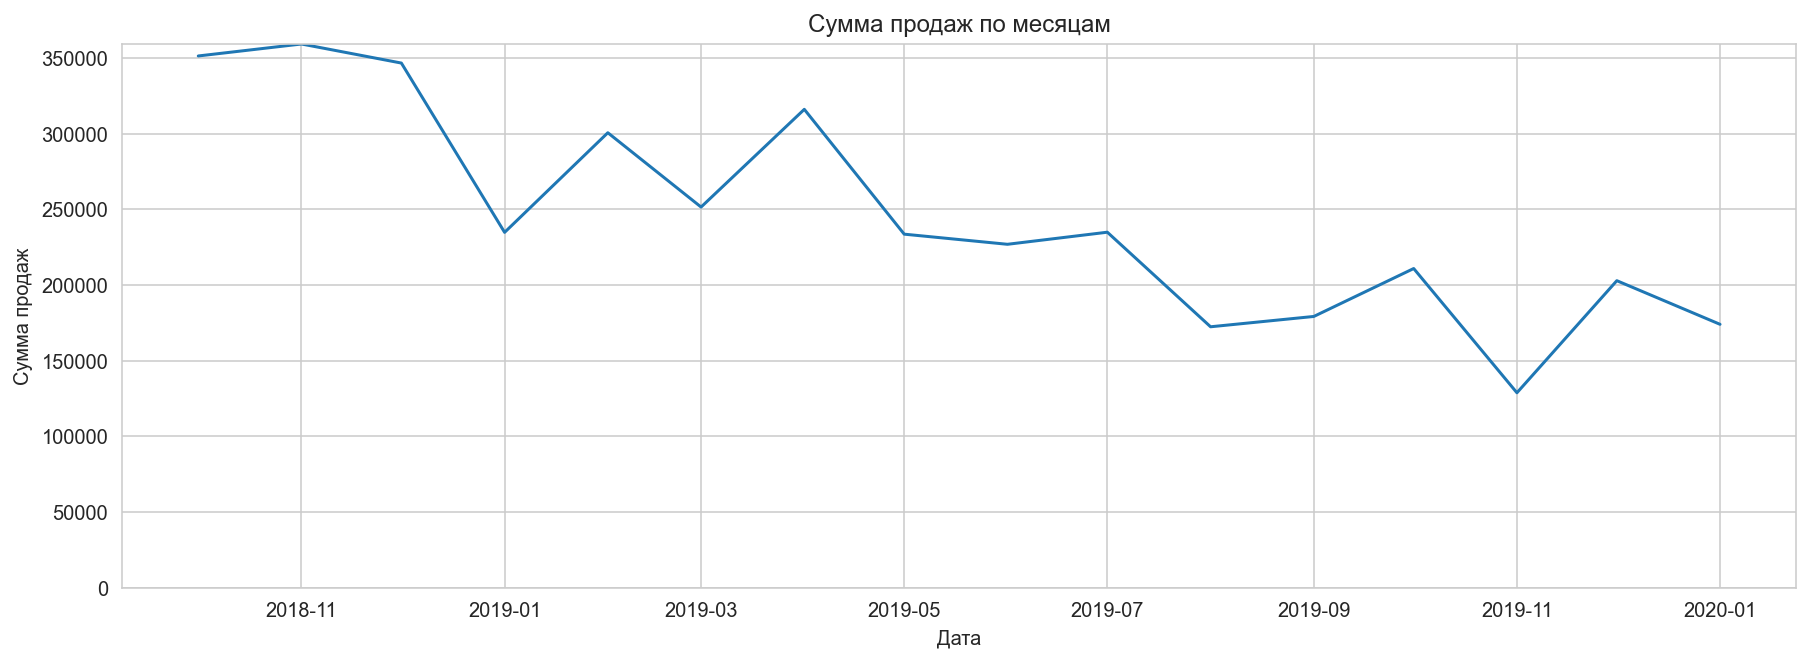

In [39]:
# Сумма продаж по времени, сгруппируем по месяцам
df2_order_price = (df2.groupby('order_id', as_index=False)[['month', 'order_price']].first()
                   .groupby('month', as_index=False)['order_price'].sum()
                  )
# полные данные
plt.figure(figsize=(15, 5))
sns.lineplot(data=df2_order_price, x='month', y='order_price')
plt.title('Сумма продаж по месяцам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.ylim(0, df2_order_price['order_price'].max())
plt.show()

* Суммарные продажи по месяцам - падают. Надо обратить на это внимание и что то делать.

### 3.4 Кол-во заказов по месяцам

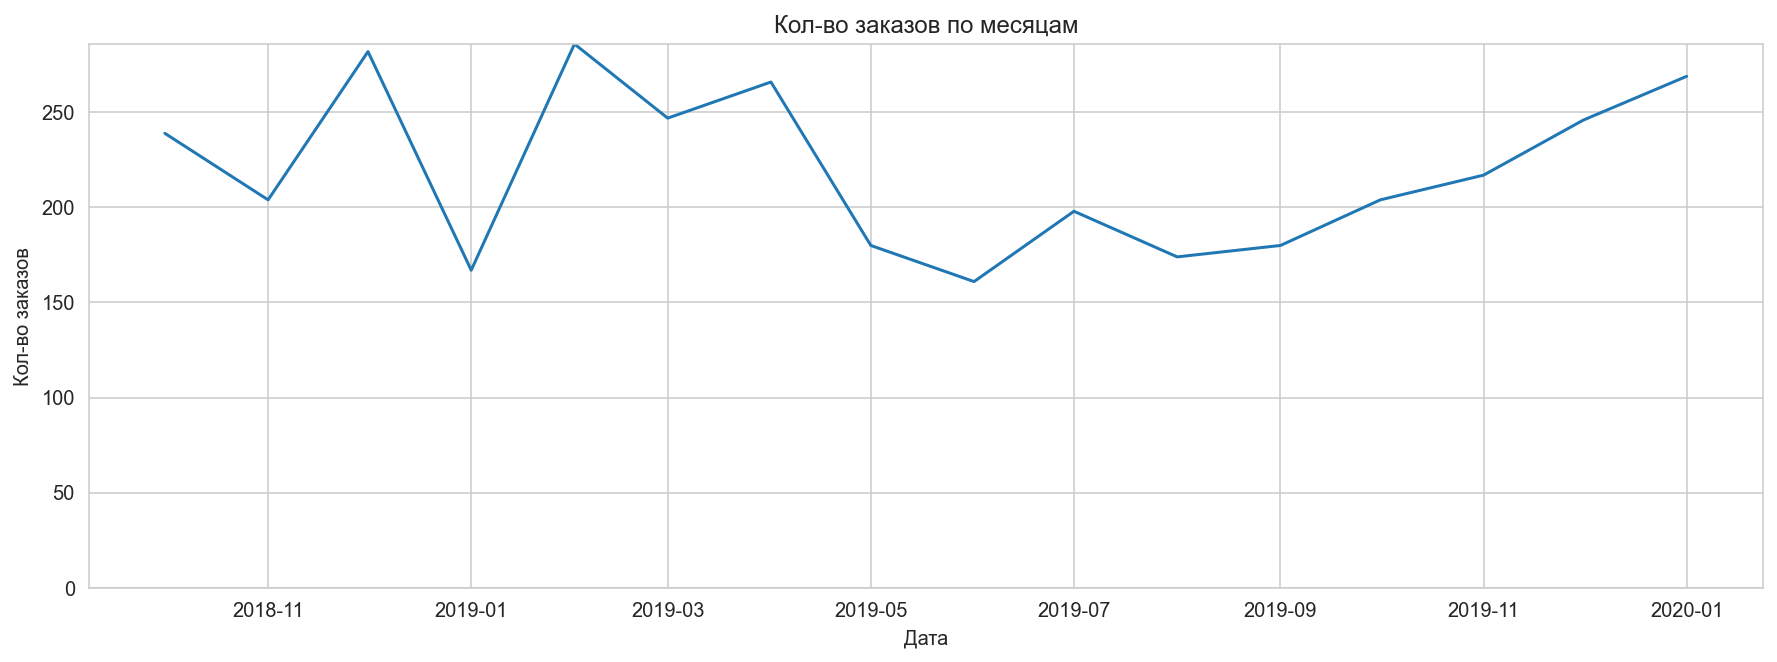

In [40]:
# Кол-во заказов по месяцам
# сгруппируем по месяцам
df2_customer_cnt = (df2.groupby(['order_id'], as_index=False)[['month', 'customer_id']].first()
                   .groupby('month', as_index=False)['order_id'].count()
                  )
plt.figure(figsize=(15, 5))
sns.lineplot(data=df2_customer_cnt, x='month', y='order_id')
plt.title('Кол-во заказов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов')
plt.ylim(0, df2_customer_cnt['order_id'].max())
plt.show()

* Количество заказов стабильно держиться почти на одном уровне 150-270шт/мес, в последние месяцы стабильно подрос под верхний диапазон ~260шт.

### 3.5 Доли категорий

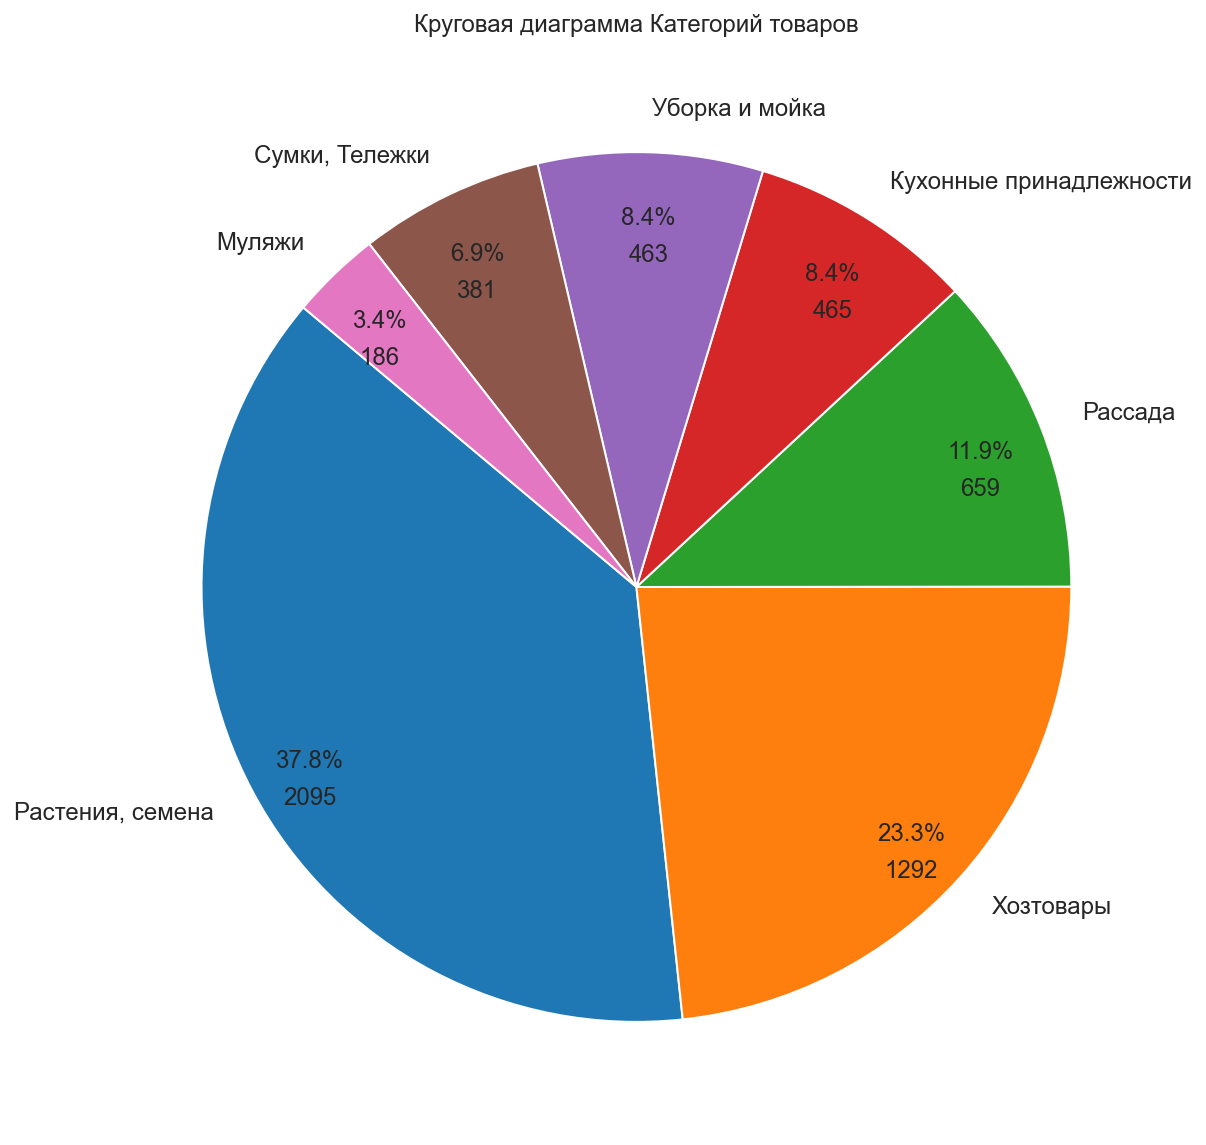

In [41]:
# Популярность категорий
cat_cnt = pd.DataFrame(df2['category'].value_counts())

plt.figure(figsize=(10, 10))
# Создаем круговую диаграмму с процентами
_, _, autotexts = plt.pie(cat_cnt['category'],
                          labels=cat_cnt.index,
                          autopct='%1.1f%%',
                          startangle=140,
                          textprops={'fontsize': 12},
                          pctdistance=0.85,
                          labeldistance=1.1)
# Добавляем числа под процентами
for i, label in enumerate(cat_cnt.index):
    plt.text(autotexts[i].get_position()[0],
             autotexts[i].get_position()[1] - 0.1,
             f'{cat_cnt["category"][i]}',
             fontsize=12,
             ha='center')
plt.title('Круговая диаграмма Категорий товаров')
plt.show()

* Самые популярные категории товаров: Растения, семена - 37,8%, Хозтовары 23,3%, Рассада 11,9%.

### 3.6 Сумма продаж по категориям

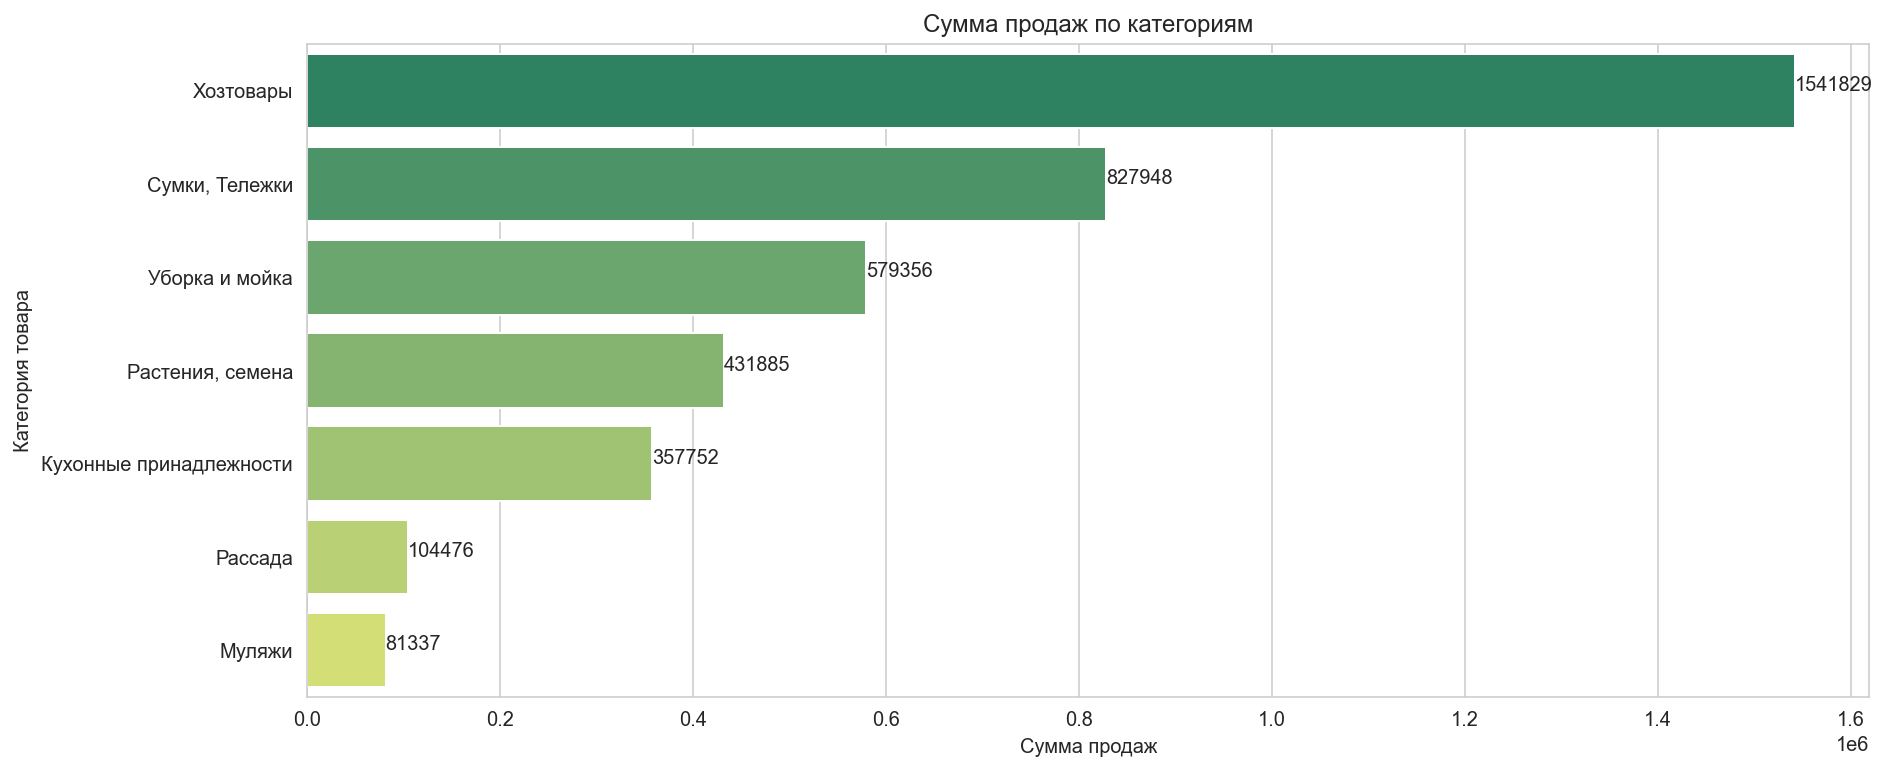

In [42]:
# Сумма продаж по категориям
df2_order_price_cat = (df2.groupby('category', as_index=False)[['price_all_q']].sum()
                       .sort_values(by='price_all_q', ascending=False)
                      )
df2_order_price_cat['price_all_q'] = df2_order_price_cat['price_all_q'].astype('int')

plt.figure(figsize=(14, 6))
sns.barplot(data=df2_order_price_cat,
            x='price_all_q',
            y='category',
            palette='summer'
            )           
# надписи числовые
for y, x in enumerate(df2_order_price_cat['price_all_q']):
    plt.text(x, y, x) # fontsize = 'large'
plt.title('Сумма продаж по категориям')
plt.xlabel('Сумма продаж')
plt.ylabel('Категория товара')
plt.show()

* По сумме продаж 1ое место Хозтовары с большим отрывом (не смотря на то что они на 2ом месте по популярности), Сумки тележки на 2ом месте (хотя по популярности они аж 6-ые, видимо дорогие), Уборка мойка на 3ем (при популярности 4ое место), а Растения всего на 4ом.

### 3.7 Сумма продаж по категориям по месяцам

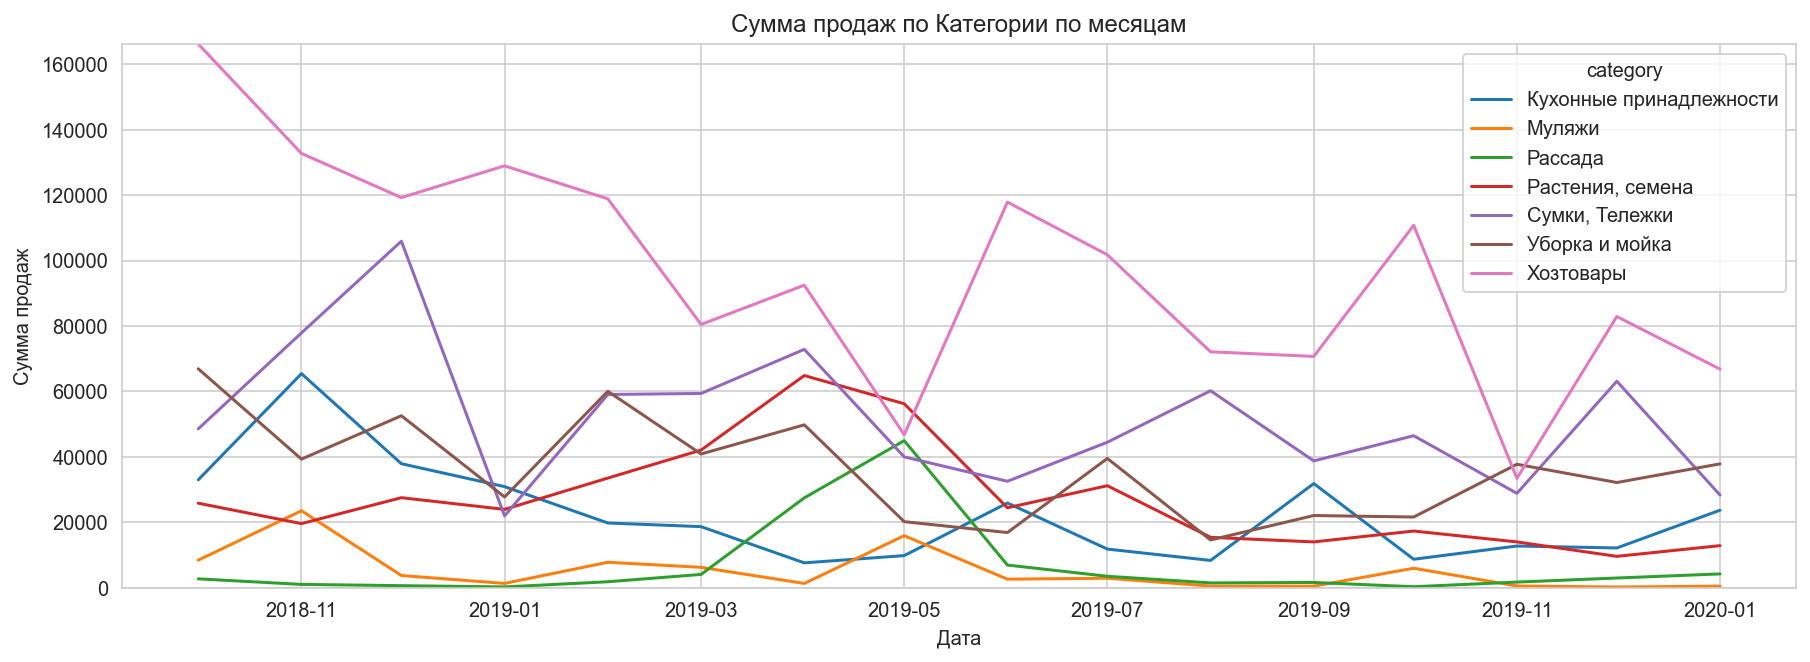

In [43]:
# Сумма продаж по Категории по месяцам
df2_cat_sum = df2.groupby(['category', 'month'], as_index=False)[['price_all_q']].sum()

# полные данные
plt.figure(figsize=(15, 5))
sns.lineplot(data=df2_cat_sum, x='month', y='price_all_q', hue='category')
plt.title('Сумма продаж по Категории по месяцам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.ylim(0, df2_cat_sum['price_all_q'].max())
plt.show()

* Из топ продаж категорий сезонность можно наблюдать у: Хозтовары - сложно уловить сезонность (в 2018 возможно реклама начиналась как хоз товаров, возможно 6,10мес, а так +- равномерно в теч. года), Сумки тележки - 12ый пик и 4ый месяца, Уборка и мойка - 2-4 месяца, Рассада -5мес, Растения и семена - 4,5мес закономерно летом, Муляжи 5 и 11мес, Кухонные принадлежности 6,9мес (не учитывая 2018ый).

## 4. Сегментация/кластеризация покупателей по профиля потребления

### 4.1 Стандартизация, Дендограмма, определить оптимальное кол-во кластеров
по матрице X для каждого пользователя = [Кол-во товара среднее 'quantity', Цена товара средняя 'price', Сумма заказа средняя, Количество заказов покупателя]

In [44]:
# подготовим датафрейм для стандартизации
#df2['customer_id', 'quantity', 'price', 'order_price', 'order_count']
# сгруппируем по профилю пользователя и заказам
df2_cl = (df2.groupby(['customer_id'], as_index=False)
         .agg(quantity_mean=('quantity', 'mean'),
              price_mean=('price', 'mean'),
              order_price=('order_price', 'first'),
              order_count=('order_count', 'first')))

# сгруппируем по профилю пользователя
df2_cl = (df2_cl.groupby(['customer_id'], as_index=False)
         .agg(quantity_mean=('quantity_mean', 'mean'),
              price_mean=('price_mean', 'mean'),
              order_price_mean=('order_price', 'mean'),
              order_count=('order_count', 'first')))
df2_cl.head(1)

,customer_id,quantity_mean,price_mean,order_price_mean,order_count
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1.0,138.75,555.0,1


In [45]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df2_cl.drop(columns=['customer_id'])
y = df2_cl['customer_id']

In [46]:
# стандартизируем данные матрицы X (признаки)
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Построим матрицу расстояний функцией linkage()
linked = linkage(X_sc, method = 'ward')

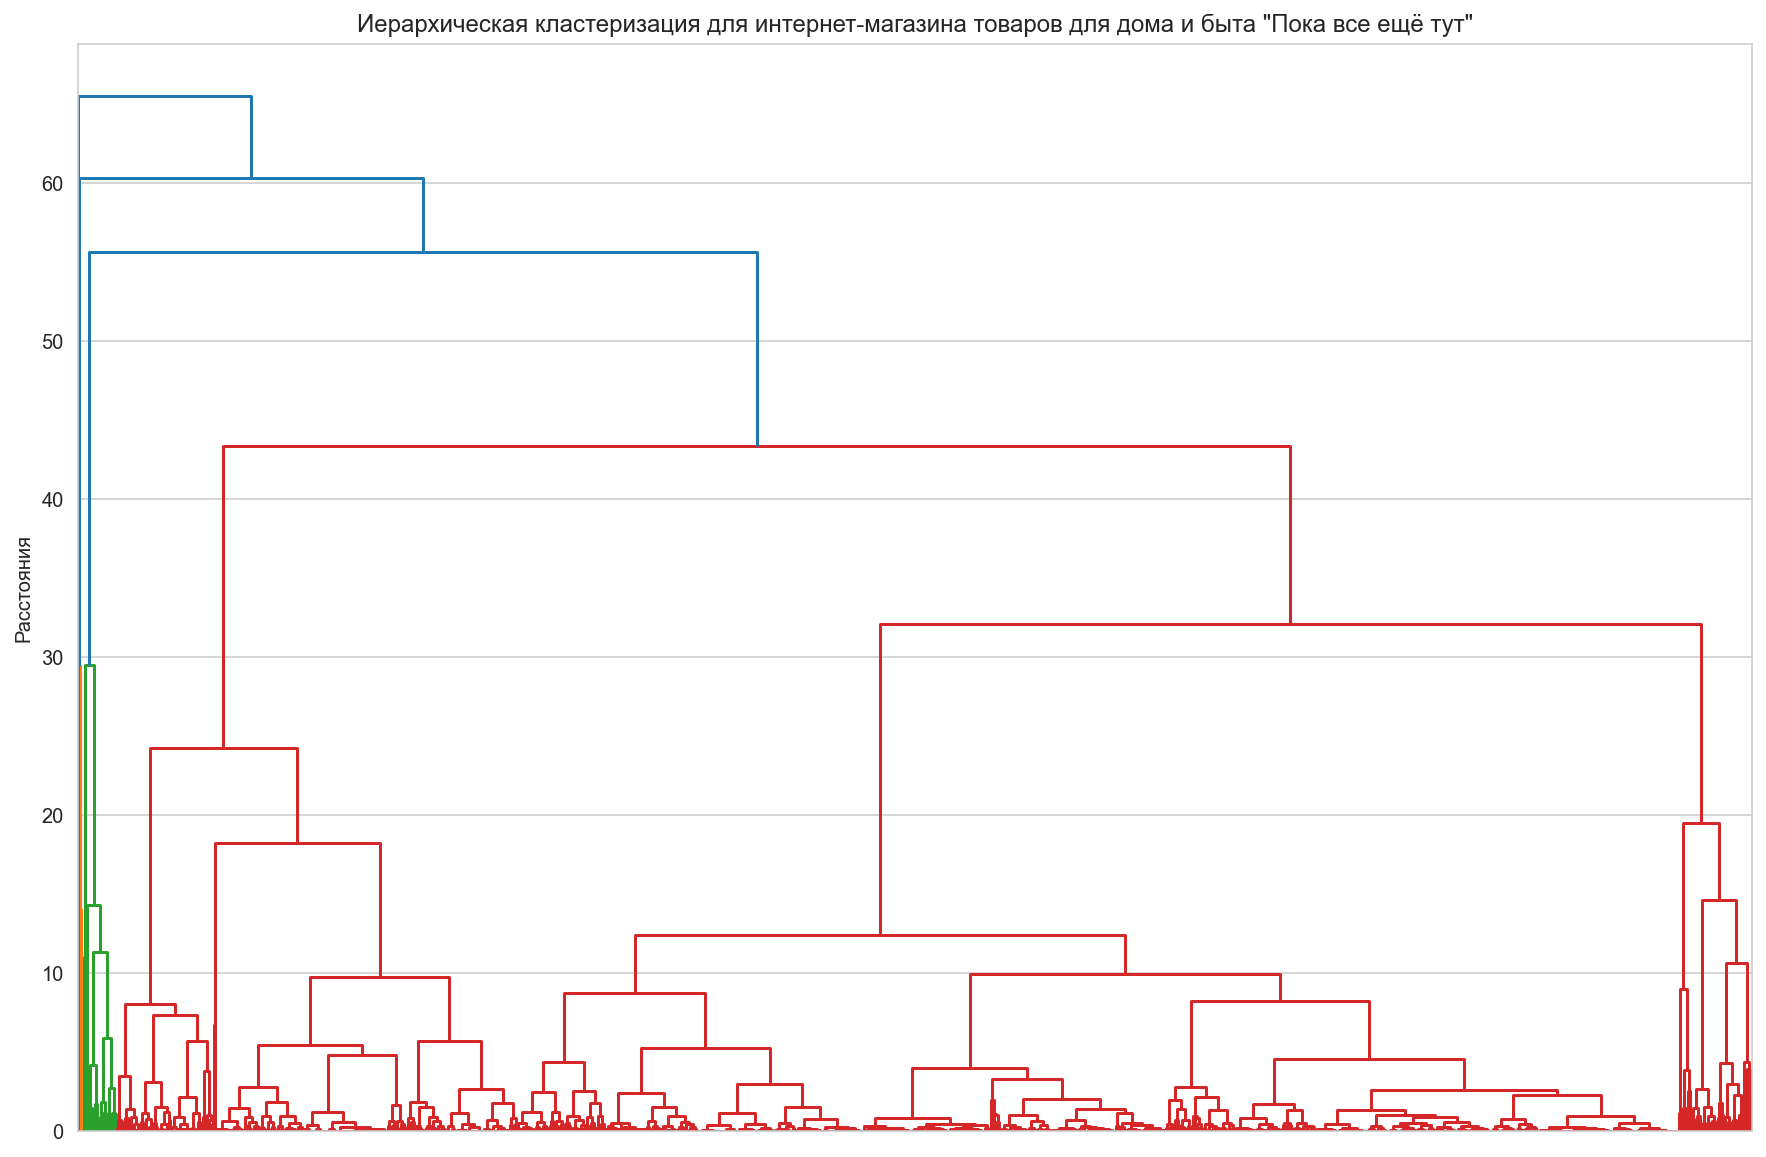

In [47]:
# Без отображения индексов дендрограмма быстро рисуется:
# на стандартизованной матрице расстояний нарисуем дендрограмму
plt.figure(figsize=(15, 10))
dendrogram(linked,
          orientation='top',
          no_labels=True
          )
plt.title('Иерархическая кластеризация для интернет-магазина товаров для дома и быта "Пока все ещё тут"')
plt.ylabel('Расстояния')
plt.show()

Плохо видно, но там 4 кластера получается

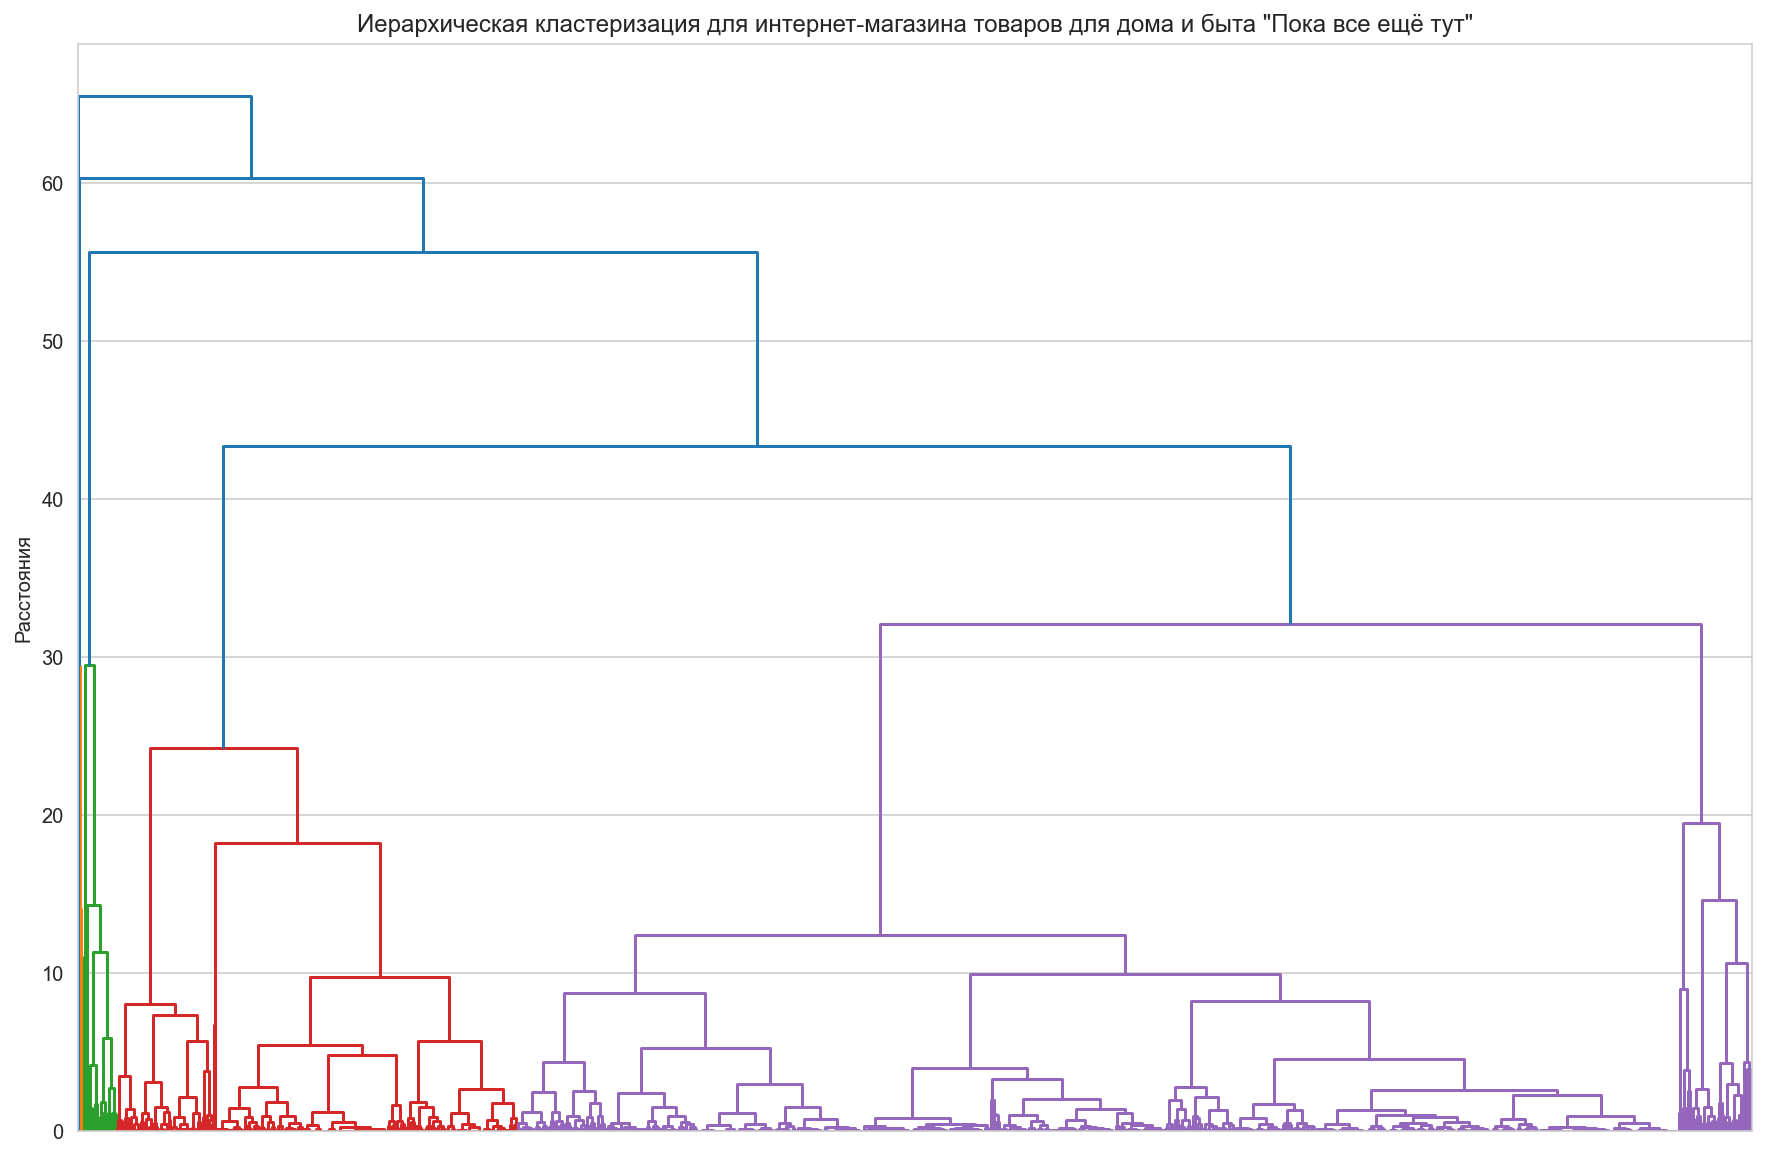

In [48]:
# вар2, с цветной разбивкой на 5 кластеров
# на стандартизованной матрице расстояний нарисуем дендрограмму
plt.figure(figsize=(15, 10))
dendrogram(linked,
          orientation='top',
          no_labels=True,
          color_threshold=33 # задаем расстояние
           )
plt.title('Иерархическая кластеризация для интернет-магазина товаров для дома и быта "Пока все ещё тут"')
plt.ylabel('Расстояния')
plt.show()

Визуально можно выделаить 4-5 кластера. Есть аномальные пользователи самый минимальный кластер. Давайте проведем анализ с 4мя кластерами.

### 4.2 Сегментация/кластеризация методом K-Means покупателей

In [77]:
# задаём модель k_means с выбранным числом кластеров и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df2_cl['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
# подкрасим высокие значения, high ограничиваем верх градиента слишком темный
df2_cl_mean = df2_cl.groupby('cluster_km').mean()
df2_cl_mean['cl_count'] = df2_cl.groupby('cluster_km')['cluster_km'].count()
df2_cl_mean['cl_count_%'] = df2_cl_mean['cl_count'] / df2_cl_mean['cl_count'].sum()
display(df2_cl_mean
        .T
        .style.background_gradient(cmap='Oranges', high = 1.5, axis=1)
        .set_precision(2)
       )

cluster_km,0,1,2,3
quantity_mean,2.68,1.77,2.34,143.85
price_mean,481.14,3276.37,932.85,92.48
order_price_mean,844.28,4445.48,674.00,12954.14
order_count,1.40,1.43,126.00,1.00
cl_count,2212.00,204.00,1.00,14.00
cl_count_%,0.91,0.08,0.00,0.01


In [50]:
#посмотрим что это за пользователи с выбранным кластером
cluster = df2_cl.query('cluster_km == 2')
display(cluster)

cluster_id = cluster['customer_id']
df2_filtered = df2[df2['customer_id'].isin(cluster_id)].sort_values(by='order_id')
df2_filtered.head(2)

,customer_id,quantity_mean,price_mean,order_price_mean,order_count,cluster_km
1903,c971fb21-d54c-4134-938f-16b62ee86d3b,2.335664,932.846154,674.0,126,2


,date,customer_id,order_id,product,quantity,price,price_all_q,order_price,order_count,month,category
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,674.0,674.0,126,2018-10-01,Уборка и мойка
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см из хлопка 4738,1,1162.0,1162.0,1162.0,126,2018-10-01,Уборка и мойка


In [51]:
# добавим кластеры в основной датафрейм
df2 = df2.merge(df2_cl[['customer_id', 'cluster_km']], on='customer_id', how='left')

Предварительная характеристика покупателей по кластерам:
* **Кластер 0 - Основные клиенты** (90% всех клиентов, 60% всех продаж), в среднем 1,4 заказа, заказывают по кол-ву немного 2,7шт по средней цене. Средний чек ниже среднего.

* **Кластер 1 - Качественные Премиум-клиенты** (8,3% всех клиентов, 30% всех продаж) , в среднем 1,4 заказа, заказывает по кол-ву немного 1,8 еденицы товара но зато цена единицы этого товара самая дорогая. Равномерное кол-во заказов среди года.

* **Кластер 2 - Редкие покупатели с большим кол-вом заказов** (126 заказов но это 1 покупатель). Самый низкий средний чек заказа, но средняя стоимость позиции чуть выше среднего.

* **Кластер 3 - Редкие потенциальные оптовики клиенты** (14шт) заказ 1, но заказывают много по кол-ву дешевых товаров и по итогу выходит у них самая большая сумма чека, но таких покупателей очень мало.

### 4.3 Графики распеределения всех признаков по кластерам

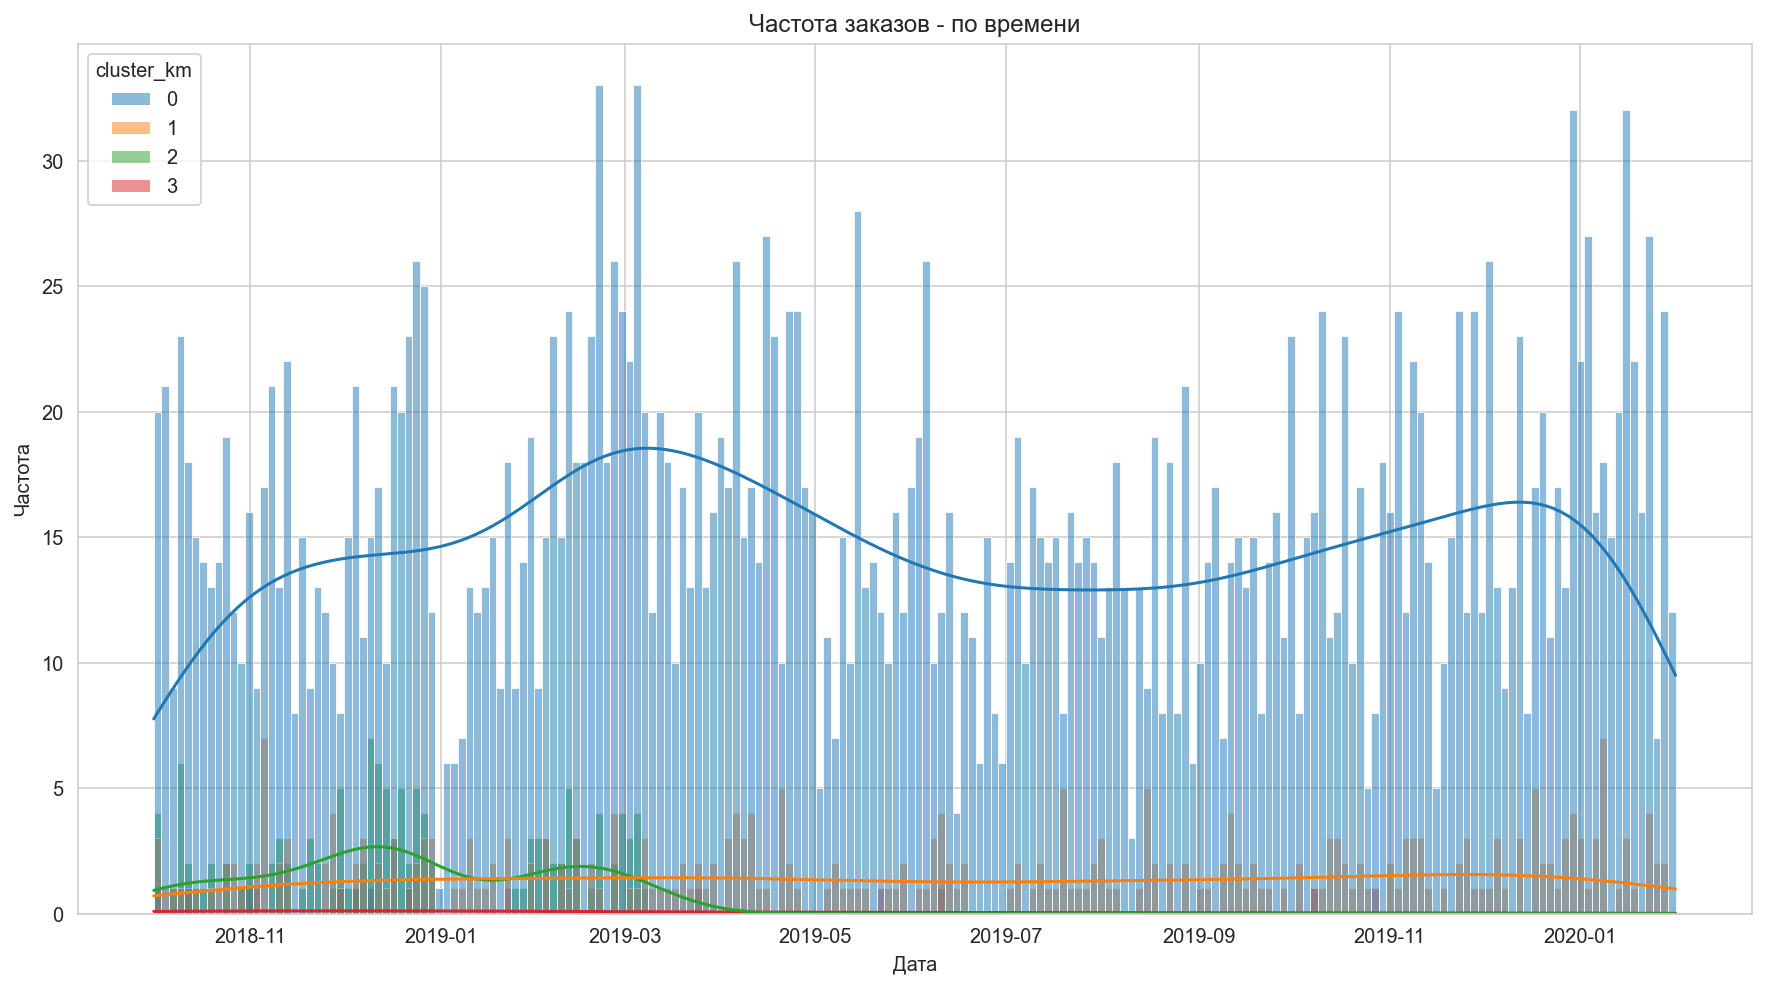

In [52]:
# график заказов по времени
plt.figure(figsize=(15,8))
sns.histplot(df2.groupby(['date', 'order_id', 'cluster_km'])['date'].first(),
             x = 'date',
             bins=200,
             hue='cluster_km',
             palette='tab10',
             kde=True
            )
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.title('Частота заказов - по времени')
plt.show()

* Кластер 0 - Сезонность - почти равномерно, можно выделить небольшой пик 2-4мес.
* Кластер 1 - -
* Кластер 2 - Сезонность - Зима (это 1 покупатель, возможно что не точно).
* Кластер 3 - -

In [53]:
# количественные признаки
df2_quantity_cl = df2[['date',
                       'quantity',
                       'price',
                       'price_all_q',
                       'cluster_km']]
df2_quantity_2 = df2.groupby(['date', 'order_id', 'cluster_km'], as_index=False)['order_price'].first()
df2_quantity_3 = df2.groupby(['customer_id', 'cluster_km'], as_index=False)['order_count'].first()

# категориальные признаки
df2_cat_cl = df2[['category',
                   'cluster_km'
                   ]]

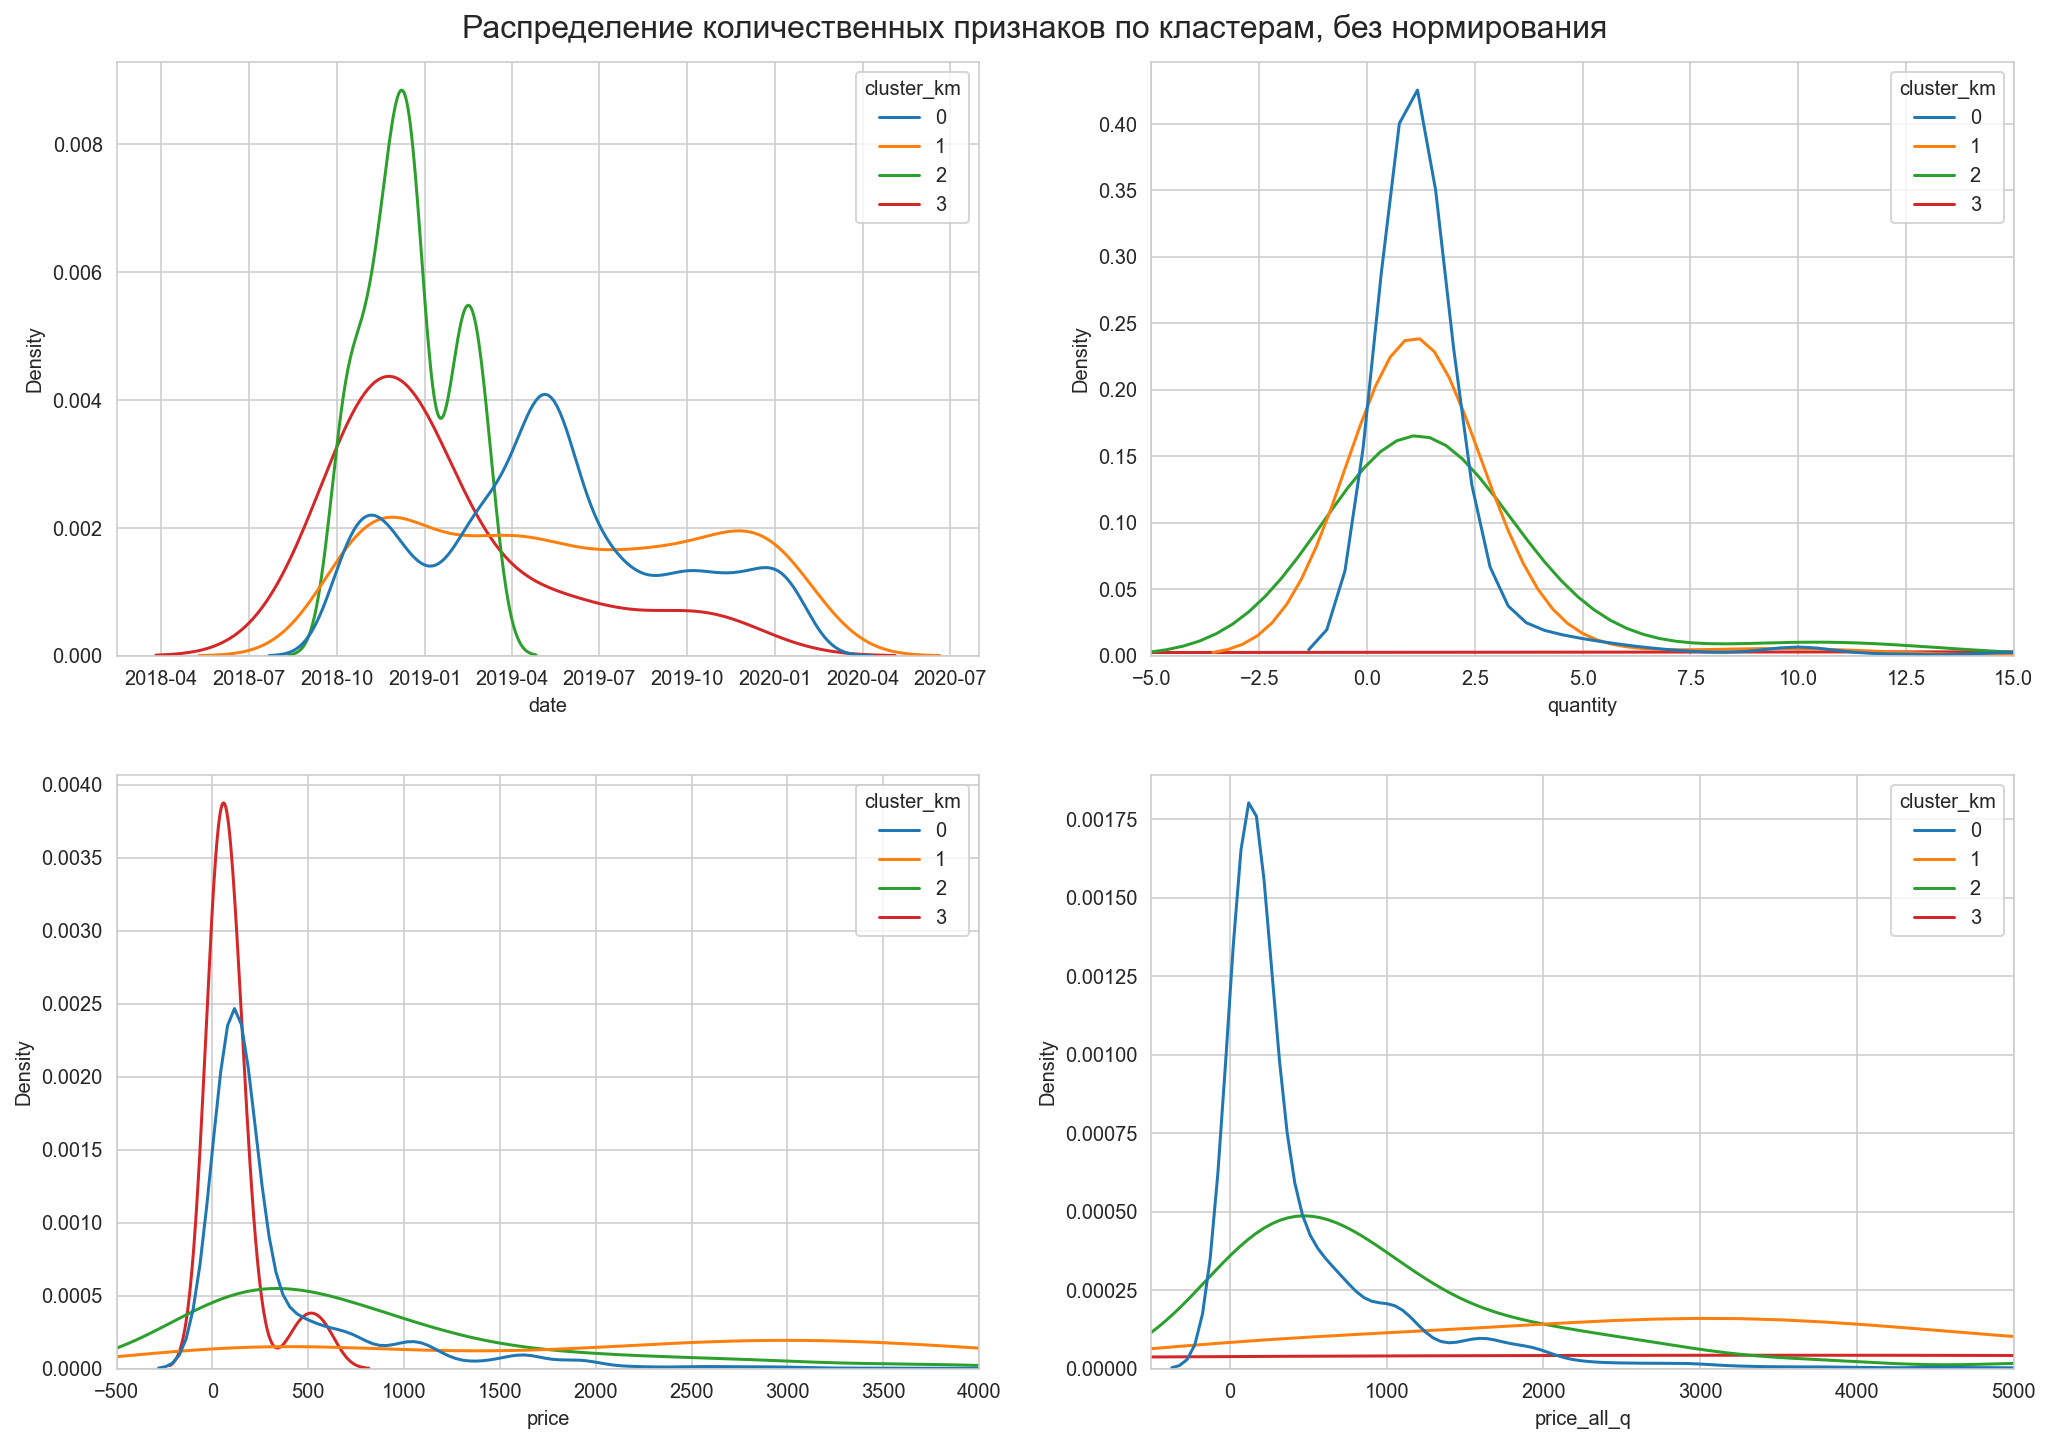

In [54]:
# распределение количественных признаков по кластерам

# числа строк и столбцов в матрице subplot
num_features = len(df2_quantity_cl.columns[:-1])  # Количество признаков
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols  # Рассчитываем количество строк

# матрица subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 11))
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.95)

limits = {
    #'date': (lower_limit1, upper_limit1),
    'quantity': (-5, 15),
    'price': (-500, 4000),
    'price_all_q': (-500, 5000)
}

# Перебор признаков и построение графиков boxplot с использованием hue
for i, column in enumerate(df2_quantity_cl.columns[:-1]):  # Исключаем последний столбец с кластерами
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.kdeplot(data=df2_quantity_cl,
                x=column,
                hue='cluster_km',
                palette='tab10',
                common_norm=False, # откл нормирование
                ax=ax)
    # Установка лимитов для оси x на основе словаря limits
    if column in limits:
        lower_limit, upper_limit = limits[column]
        ax.set_xlim(left=lower_limit, right=upper_limit)

    
fig.suptitle('Распределение количественных признаков по кластерам, без нормирования', fontsize=16)
plt.show()

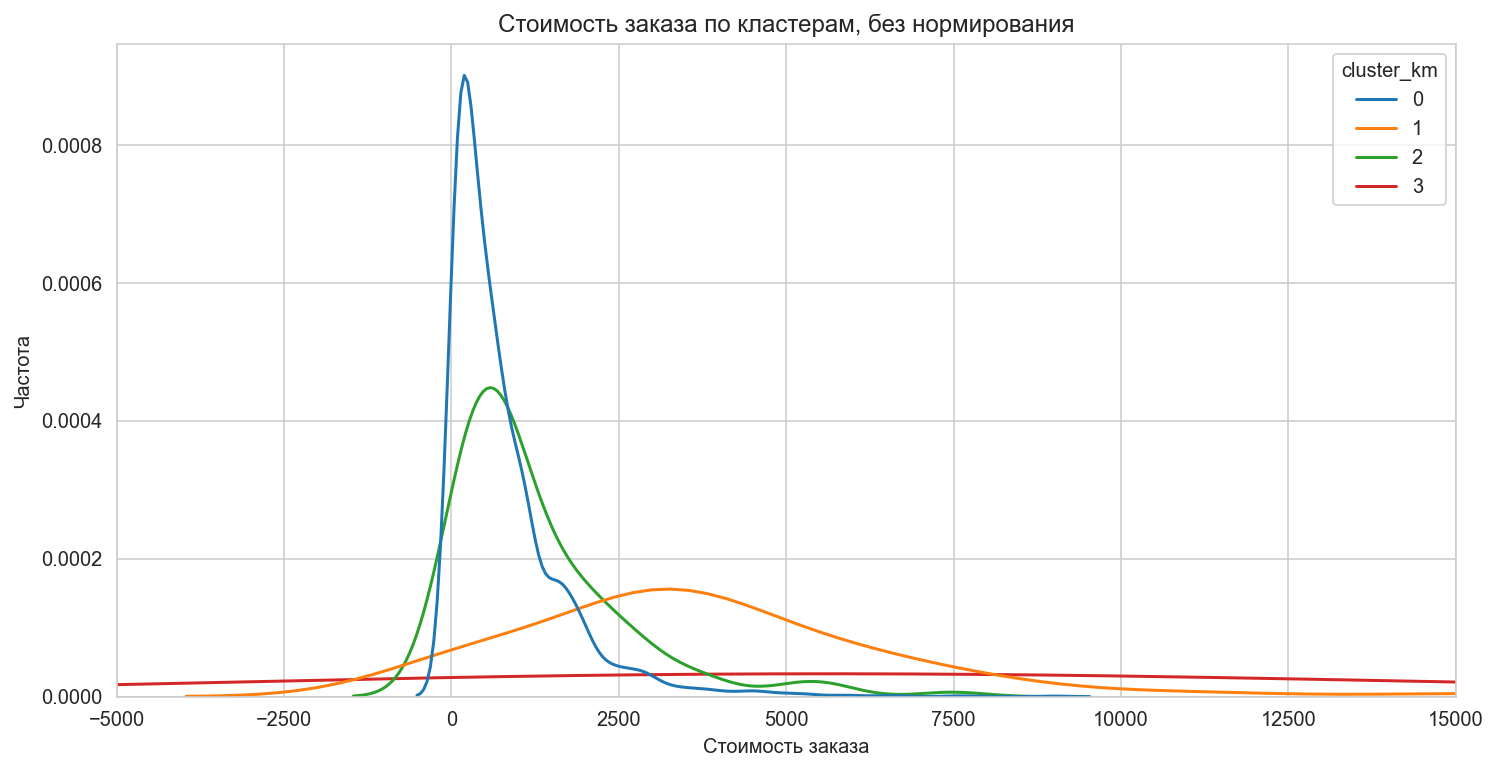

In [55]:
# Стоимость заказа по кластерам
plt.figure(figsize=(12,6))
sns.kdeplot(data=df2_quantity_2,
                x='order_price',
                hue='cluster_km',
                palette='tab10',
                common_norm=False # откл нормирование
                )
plt.xlabel('Стоимость заказа')
plt.ylabel('Частота')
plt.title('Стоимость заказа по кластерам, без нормирования')
plt.xlim(-5000,15000)
plt.show()

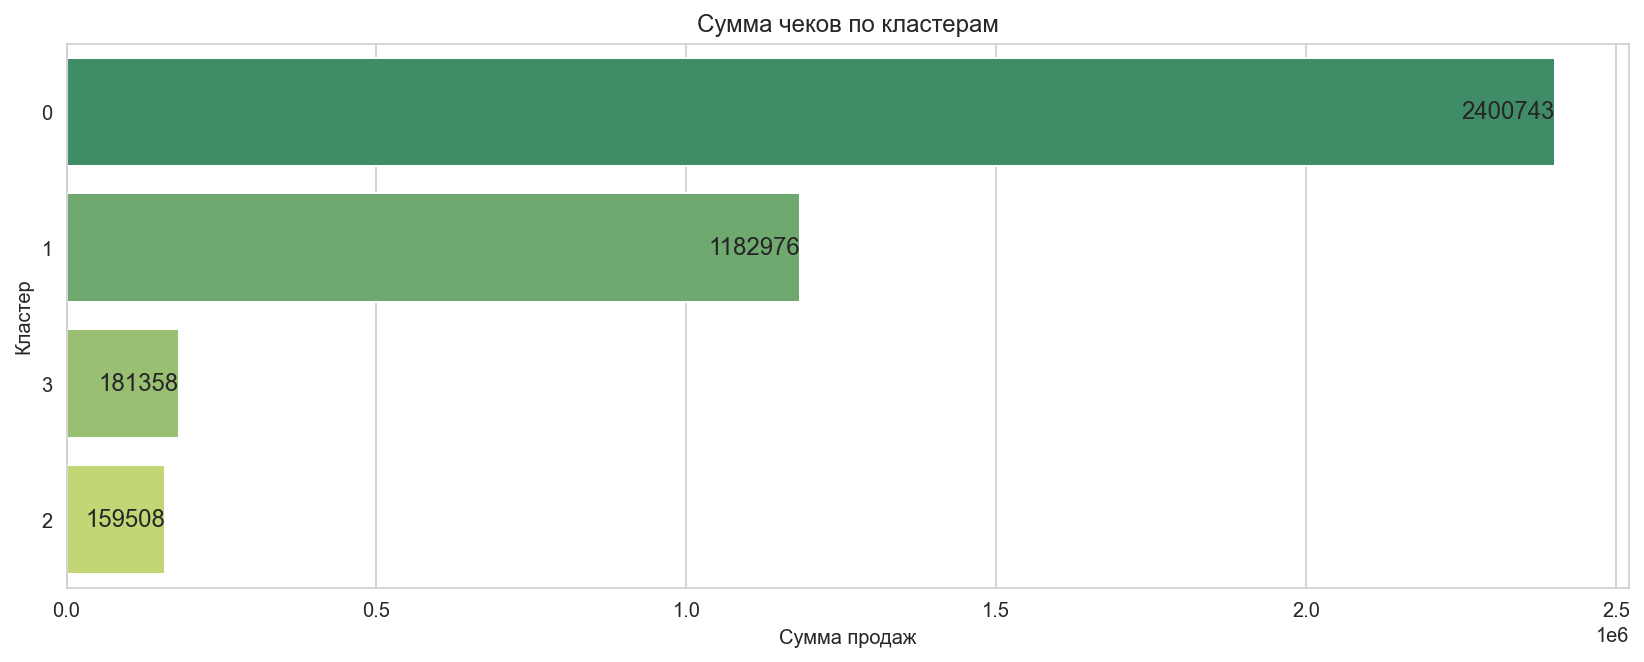

In [56]:
# Сумма чеков по кластерам
df2_quantity_2_sum = (df2_quantity_2.groupby('cluster_km', as_index=False)[['order_price']].sum()
                      .sort_values(by='order_price', ascending=False)
                      .reset_index()
                      )
#display(df2_quantity_2_sum)
plt.figure(figsize=(14, 5))
sns.barplot(data=df2_quantity_2_sum,
            x='order_price',
            y='cluster_km',
            palette='summer',
            orient='h',
            order=df2_quantity_2_sum.sort_values(by='order_price', ascending=False)['cluster_km']
            )       
# # Установка сортировки надписей
for i, row in df2_quantity_2_sum.iterrows():
    plt.text(int(row['order_price']), i, int(row['order_price']), va='center', ha='right', fontsize=12)

plt.title('Сумма чеков по кластерам')
plt.xlabel('Сумма продаж')
plt.ylabel('Кластер')
plt.show()

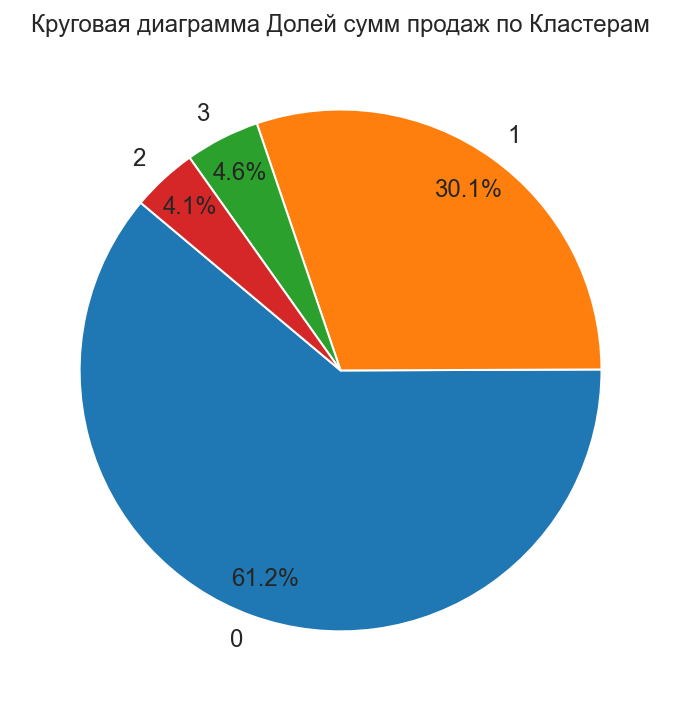

In [57]:
# Круговая диаграмма Долей сумм продаж по Кластерам

plt.figure(figsize=(6, 6))
# Создаем круговую диаграмму с процентами
plt.pie(df2_quantity_2_sum['order_price'],
                          labels=df2_quantity_2_sum['cluster_km'],
                          autopct='%1.1f%%',
                          startangle=140,
                          textprops={'fontsize': 12},
                          pctdistance=0.85)
plt.title('Круговая диаграмма Долей сумм продаж по Кластерам')
plt.show()

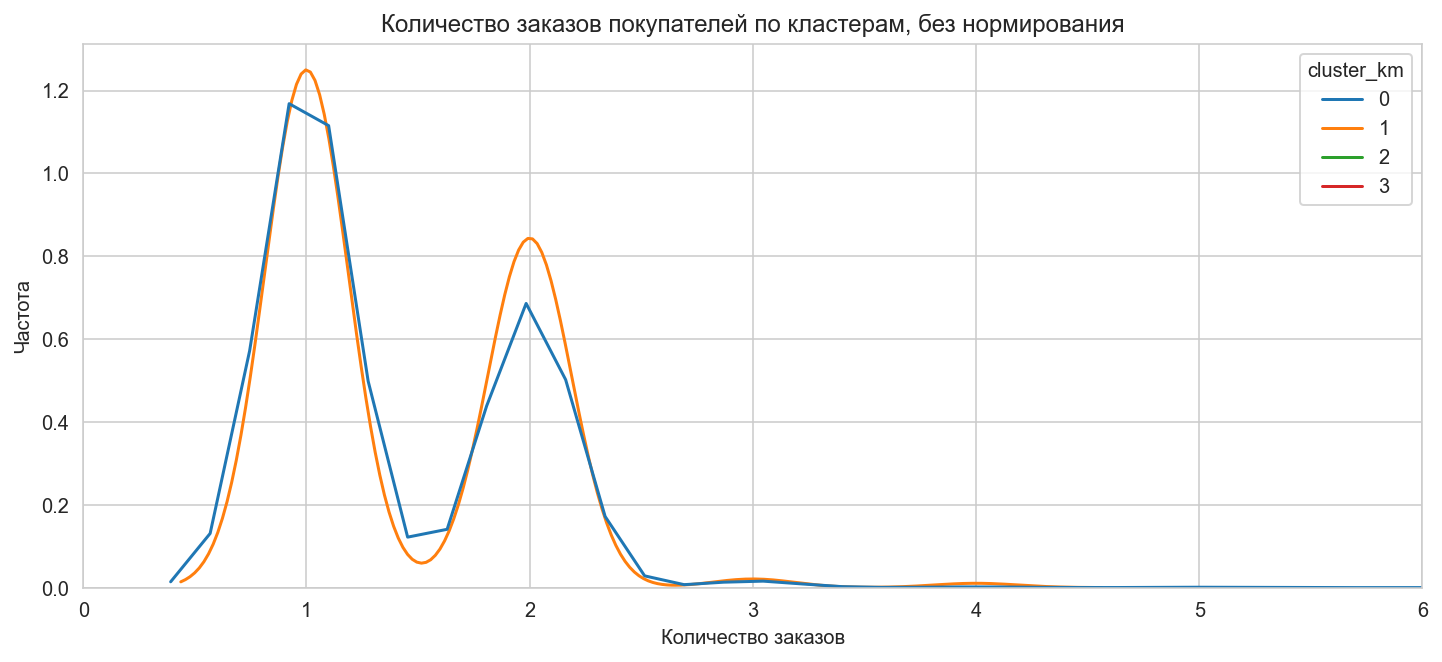

In [58]:
# Количество заказов по кластерам
plt.figure(figsize=(12,5))
sns.kdeplot(data=df2_quantity_3,
                x='order_count',
                hue='cluster_km',
                palette='tab10',
                common_norm=False # откл нормирование
                )
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.title('Количество заказов покупателей по кластерам, без нормирования')
plt.xlim(0,6)
plt.show()

Предупреждение говорит нам что в датасете дисперсия (variance) = 0, и поэтому невозможно отобразить кластер.

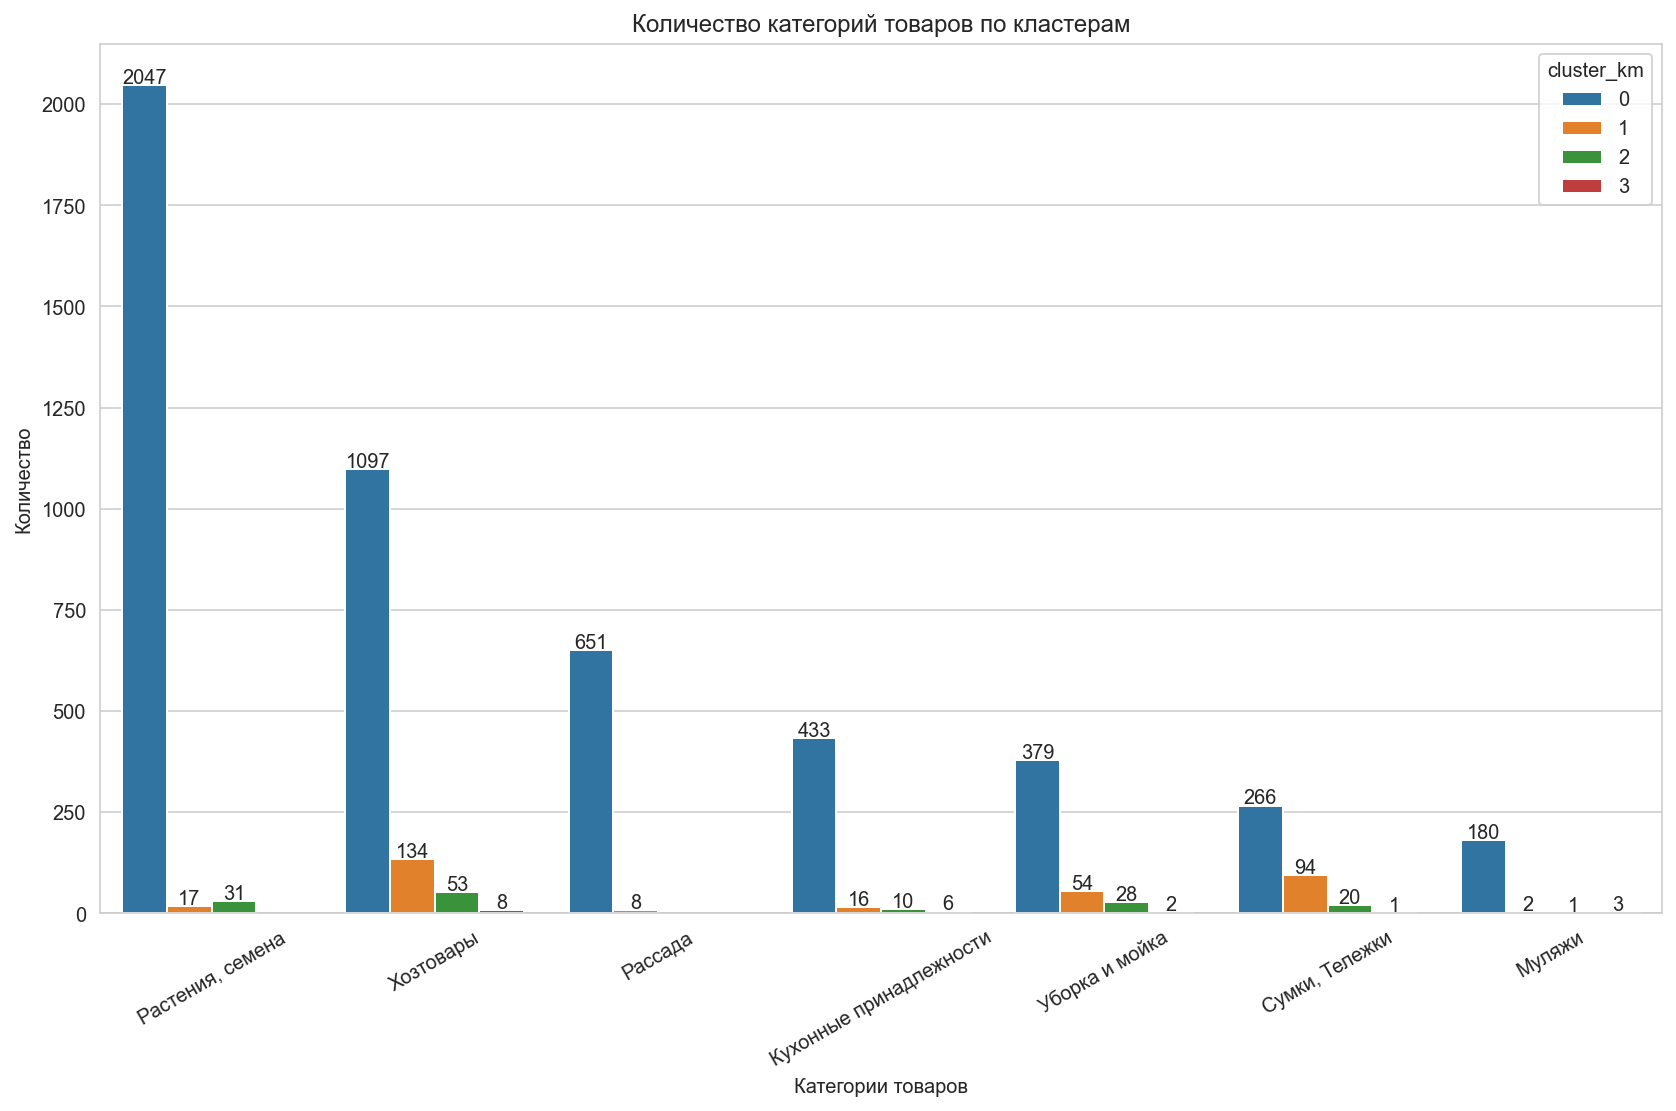

In [59]:
# распределение категориальных признаков по кластерам
plt.figure(figsize=(14,8))

category_order = df2_cat_cl['category'].value_counts().index
ax = sns.countplot(data=df2_cat_cl,
              x='category',
              hue='cluster_km',
              palette='tab10',
              order=category_order  # сортировка
             )
plt.xlabel('Категории товаров')
plt.ylabel('Количество')
plt.title('Количество категорий товаров по кластерам')
plt.xticks(rotation=30)
# Добавление округленных чисел над столбцами
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height + 5),
                    ha='center',
                    va='baseline')
plt.show()

In [60]:
# # построим графики популярности категорий товаров по времени по каждому кластеру
# # уникальные кластеры 
# clusters = sorted(df2['cluster_km'].unique()) # [0, 1, 2, 3]
# # сгруппируем таблицу по категориям, месяцам, сумме позиций
# df2_cat_sum_cl = df2.groupby(['category', 'month', 'cluster_km'], as_index=False)[['price_all_q']].sum()

# # переберем все кластеры и сделаем график для каждого
# for cl in enumerate(clusters):
#     df2_cat_sum_cl_temp = df2_cat_sum_cl.query('cluster_km == @cl[1]')
#     plt.figure(figsize=(15, 4))
#     sns.lineplot(data=df2_cat_sum_cl_temp,
#                  x='month',
#                  y='price_all_q',
#                  hue='category',
#                  #sort=False,
#                  #markers=True
#                 )
#     plt.title(f'Сумма продаж по Категориям по месяцам Кластера {cl[1]}')
#     plt.xlabel('Дата')
#     plt.ylabel('Сумма продаж')
#     plt.ylim(0, df2_cat_sum_cl_temp['price_all_q'].max())
#     plt.show()

# lineplot проводит линию даже есть в месяце 0 продаж..
# а при 1ой продаже не проводит линию если до и после пропуски

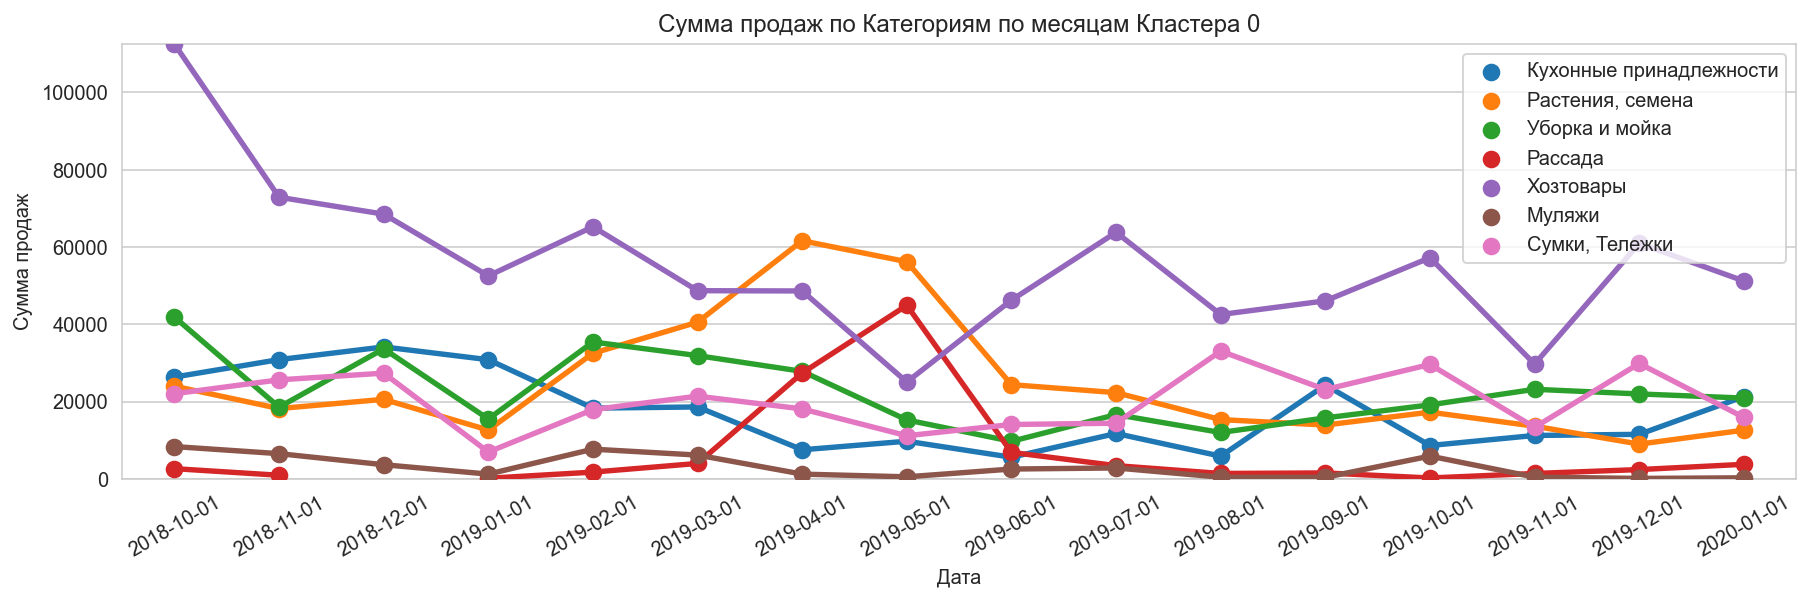

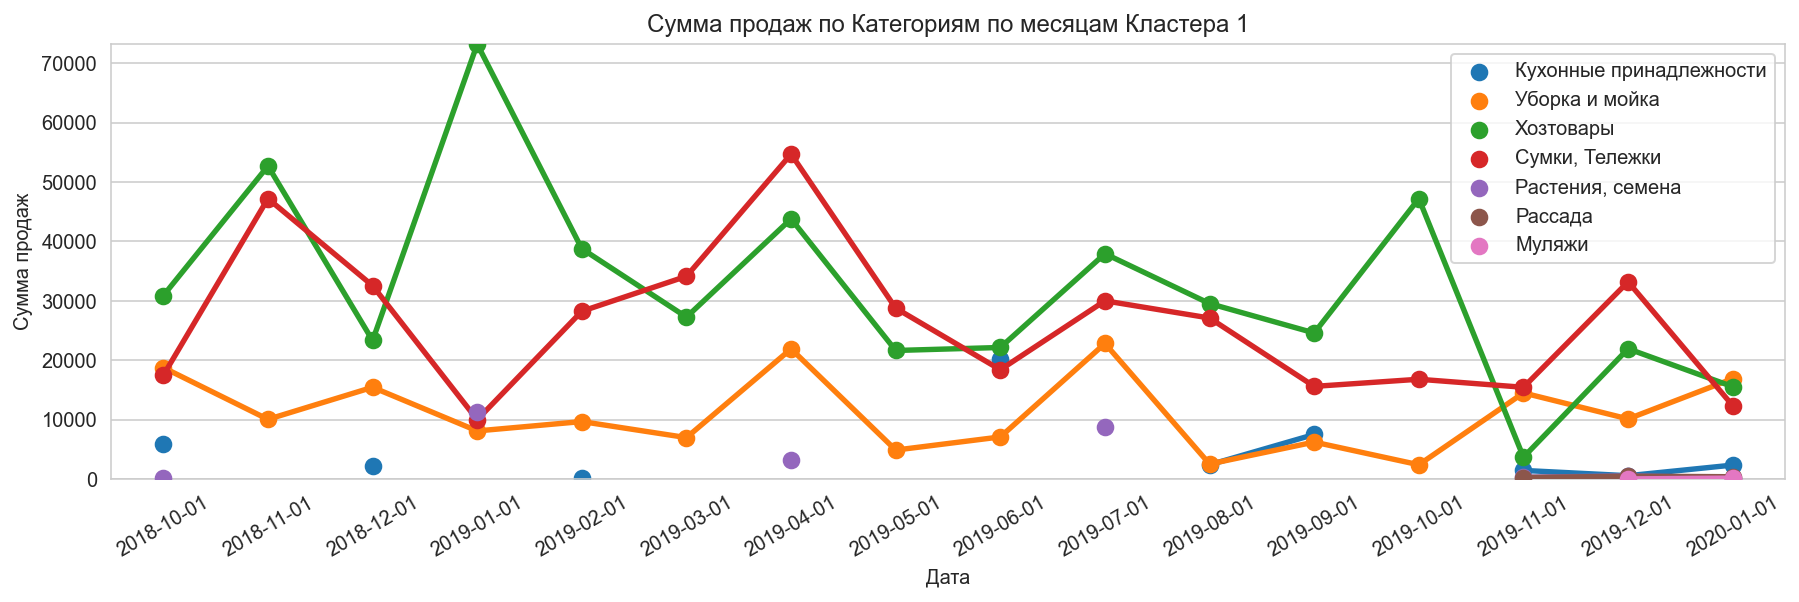

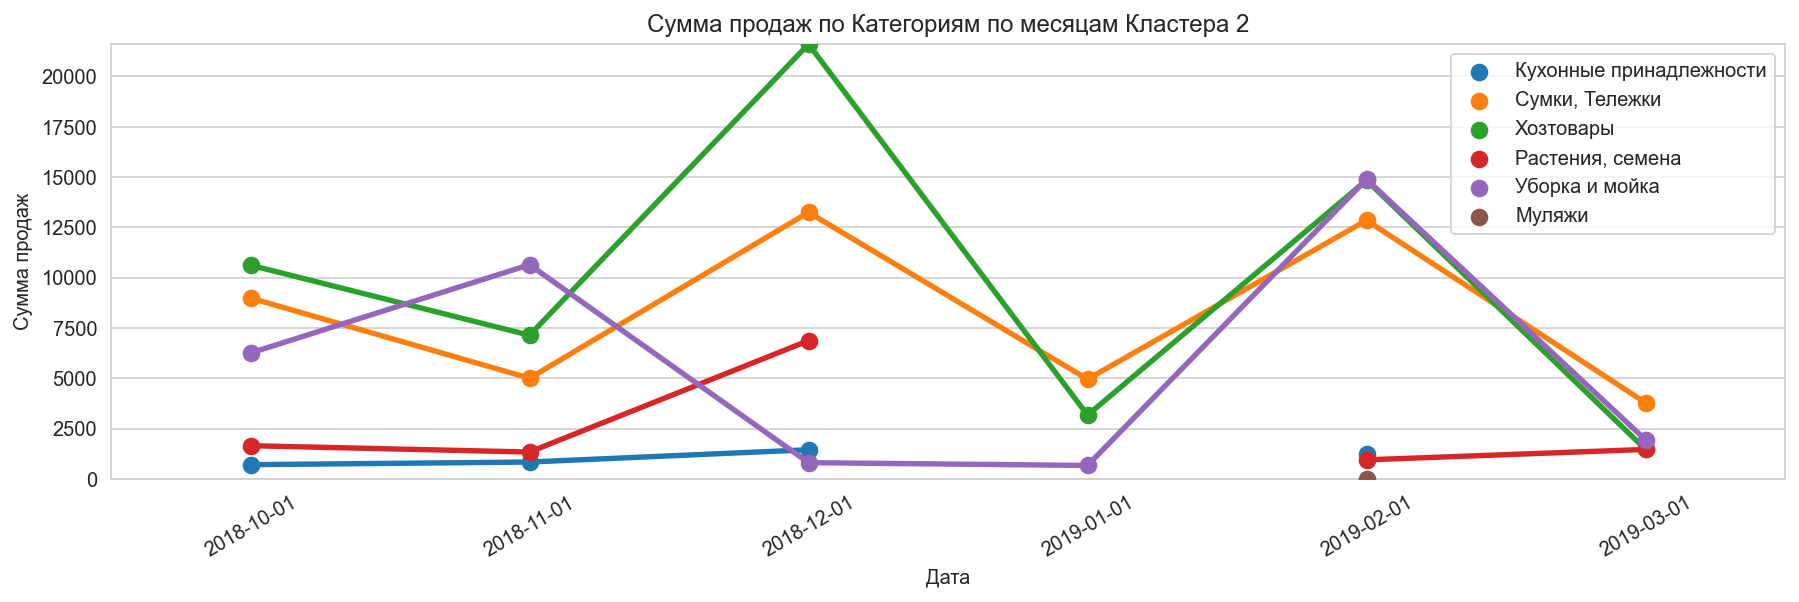

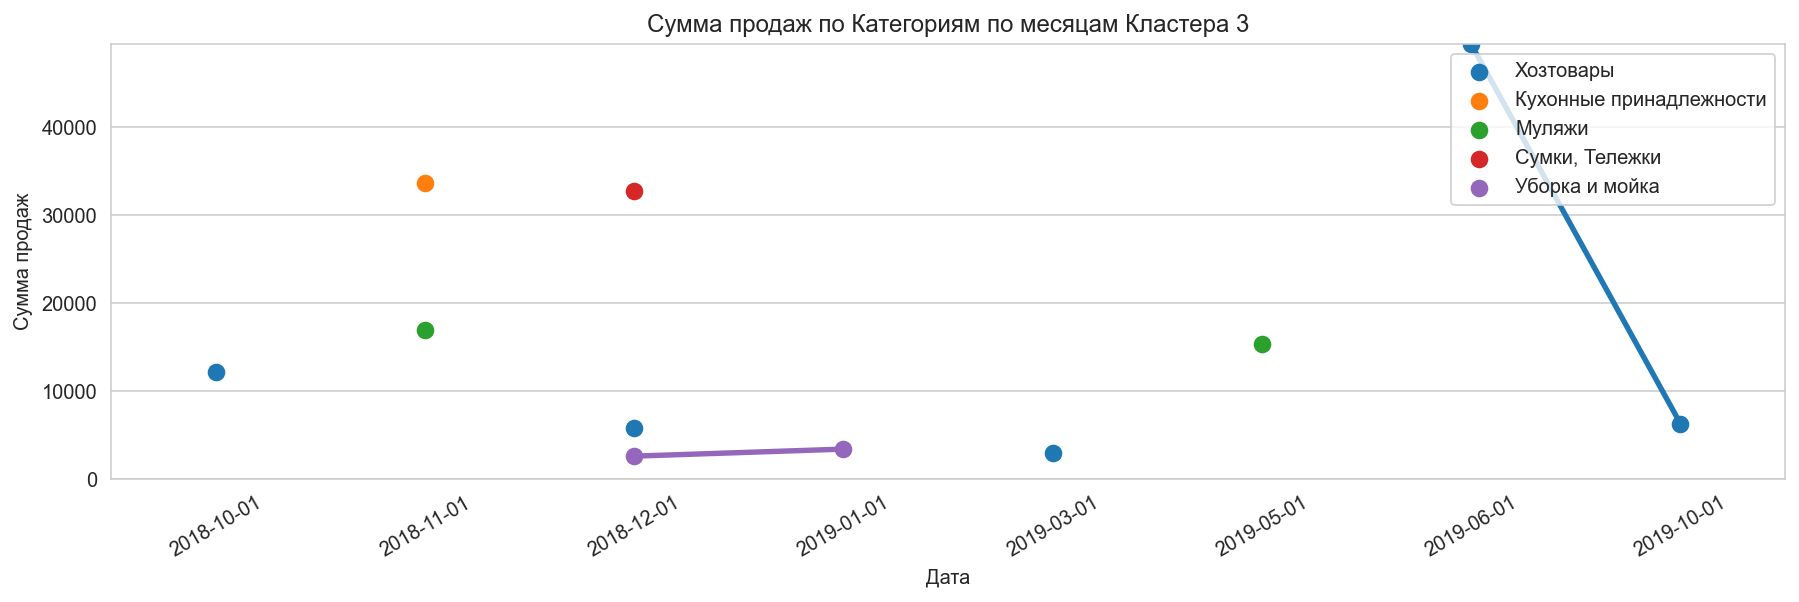

In [61]:
# тест
# построим графики популярности категорий товаров по времени по каждому кластеру

# уникальные кластеры 
clusters = sorted(df2['cluster_km'].unique()) # [0, 1, 2, 3]
# сгруппируем таблицу по категориям, месяцам, сумме позиций
df2_cat_sum_cl = df2.groupby(['category', 'month', 'cluster_km'], as_index=False)[['price_all_q']].sum()
df2_cat_sum_cl['month'] = pd.to_datetime(df2_cat_sum_cl['month']).dt.date

# графики для каждого кластера
for cl in clusters:
    df2_cat_sum_cl_temp = df2_cat_sum_cl[df2_cat_sum_cl['cluster_km'] == cl]    

    plt.figure(figsize=(15, 4))
    ax = sns.pointplot(data=df2_cat_sum_cl_temp.sort_values(by='month'),
                 x='month',
                 y='price_all_q',
                 hue='category'
                )
    
    plt.title(f'Сумма продаж по Категориям по месяцам Кластера {cl}')
    plt.xlabel('Дата')
    plt.ylabel('Сумма продаж')
    plt.xticks(rotation=30)
    plt.ylim(0, df2_cat_sum_cl_temp['price_all_q'].max())
    # Закрепление легенды слева сверху
    ax.legend(bbox_to_anchor=(1, 1), loc='upper right')
    plt.show()

**Выводы по Кластеризации покупателей:**
* **Кластер 0 - Основные клиенты** (90% всех клиентов, 60% всех продаж), в среднем 1,4 заказа, заказывают по кол-ву немного 2,7шт по средней цене. Средний чек ниже среднего. Дает основную сумму продаж интернет-магазину 61%.
    * Предпочтительные категории: Растения семена и Рассада 4/5мес, Хозтовары почти всё время(провалы 5,11мес), Уборка/Мойка -2мес. Сезонность в целом - почти равномерно, можно выделить небольшой пик 2-4мес.
    * Рекомендации: На главной странице сайта и в рекламных баннерах стоит обозначить Пеларгонию (в топ10 товаров эта позиция 9/10), Растения и семена, Рассаду, ну и Хозтовары( Видимо люди покупают Растения и семена и дополнительно докупают Хозтовары а они выходят больше по сумме чем растения). Также это увеличит приток основной массы людей на сайт.

* **Кластер 1 - Качественные Премиум-клиенты** (8,3% всех клиентов, 30% всех продаж) , в среднем 1,4 заказа, заказывает по кол-ву немного 1,8 еденицы товара но зато цена единицы этого товара самая дорогая. Равномерное кол-во заказов среди года. По сумме чека на 2ом месте (выше среднего). 
    * Предпочтительные категории: Хозтовары -1,10мес, Сумки тележки - 4,11мес, Уборка/Мойка -4,7мес. 
    * Рекомендации: деласть целевую рассылку со скидками на дорогие товары из категорий Хозтовары и Сумки/тележки.

* **Кластер 2 - Редкие покупатели с большим кол-вом заказов** (126 заказов но это 1 покупатель). Самый низкий средний чек заказа, но средняя стоимость позиции чуть выше среднего. 
    * Предпочтительные категории: Хозтовары -6мес. *(малая выборка).
    * Рекомендации: Можно ему тоже сделать супер предложение или постоянную скидку постоянного покупателя, потому что 126 заказов это очень много, и если он вернеться, то будет постоянно покупать.

* **Кластер 3 - Редкие потенциальные оптовики клиенты** (14шт) заказ 1, но заказывают много по кол-ву дешевых товаров и по итогу выходит у них самая большая сумма чека, но таких покупателей очень мало. 
    * Предпочтительные категории: Хотовары -6,10мес, Сумки тележки - 12мес, Кух.принадлежности -11мес. 
    * Рекомендации: деласть целевую рассылку со скидками на дешевые товары из категории Хозтовары.

## 5. Проверить статистические гипотезы

###  5.1 Проверка гипотез на различие между средними чеками кластеров (все комбинации)
```
Зададим гипотезы для комбинаций кластеров [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
Общие:
H_0 (нулевая гипотеза): Нет различий между средними чеками сегментов/кластеров покупателей (x, y)
H_A (альтер-ая гипотеза): Есть различия между средними чеками сегментов/кластеров покупателей (x, y)
alpha = 0.05 (Исходный уровень статистической значимости)
```

In [62]:
# отфильтруем датафрейм с нужными колонками с чеками покупателей
hypo = (df2.groupby(['customer_id', 'cluster_km', 'order_id'],\
                    as_index=False)[['order_price']].first()
        )
# посчитаем сколько у нас каждого кластера в датафрейме заказов
hypo['cluster_km'].value_counts()

0    3088
1     292
2     126
3      14
Name: cluster_km, dtype: int64

Кластера 1 маловато конечно по количеству, но разницы там должно быть достаточно.

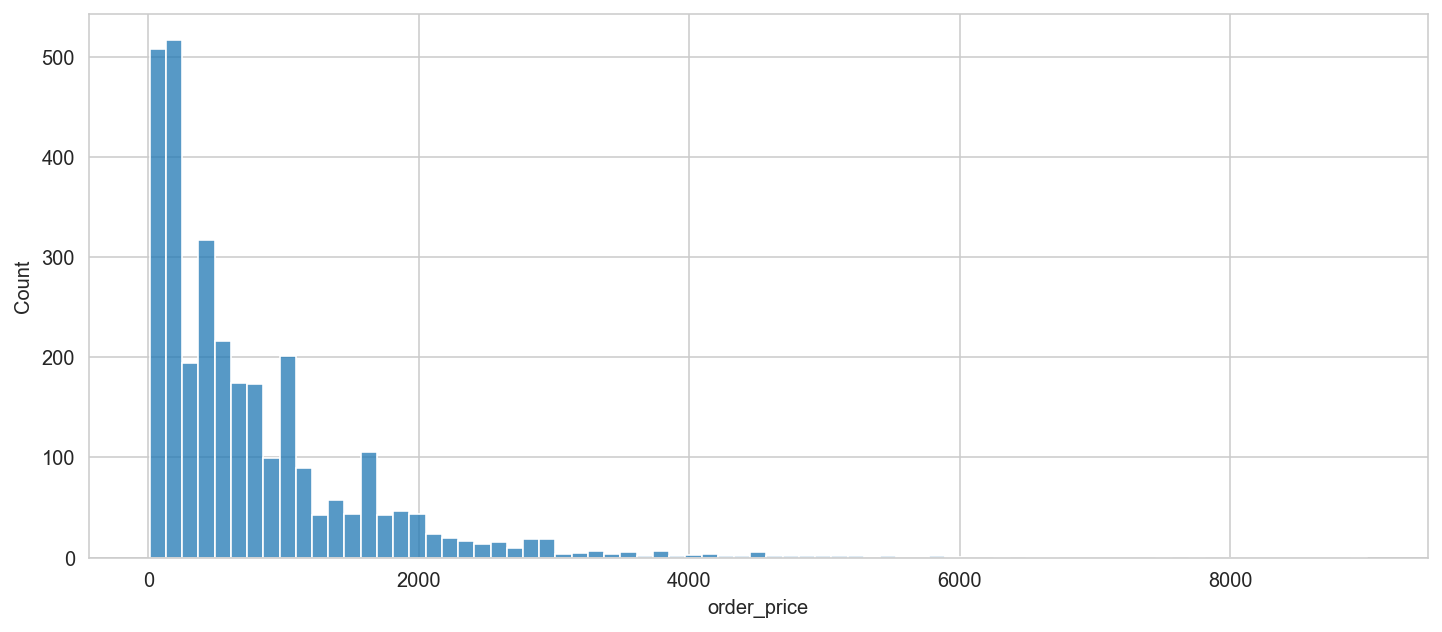

In [63]:
# проверим на нормальность распределение средних
plt.figure(figsize=(12,5))
sns.histplot(hypo.query('cluster_km == 0')['order_price'])
plt.show()

In [64]:
# тест Шапиро-Уилка на нормальное распределение
# H0 гипотеза что данные распределены нормально при p > 0,05
stat, p = shapiro(hypo.query('cluster_km == 0')['order_price'])  # data - ваш набор данных
print(f"Статистика теста: {stat}, p-значение: {p}")

Статистика теста: 0.7493896484375, p-значение: 0.0


Данные распределены не нормально, поэтому применяем тест Критерий Манна-Уитни (Mann-Whitney U Test)

In [65]:
# создадим список кластеров
clusters = sorted(hypo['cluster_km'].unique()) # [0, 1, 2, 3]

# создадим все возможные комбинации кластеров
# [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
clusters_combo = list(itertools.combinations(clusters, 2))

In [66]:
# создадим функцию для тестов
def mw (df, col, cluster_1, cluster_2):
    '''Функция для теста mannwhitneyu
    На вход подаем: датафрейм, признак,
    кластер 1, кластер 2'''
    
    # отфильтруем две выборки
    hypo1 = df.query(f'cluster_km == {cluster_1}')[[col]].dropna()
    hypo2 = df.query(f'cluster_km == {cluster_2}')[[col]].dropna()

    print(f'ТЕСТ Критерий Манна-Уитни для комбинации кластеров {cluster_1} vs {cluster_2}: \n')
    print(f'Средний параметр покупателя Кластера {cluster_1}: {(hypo1.mean().values[0]):.3f}')
    print(f'Средний параметр покупателя Кластера {cluster_2}: {(hypo2.mean().values[0]):.3f}')
    
    global p_value
    # Выполнение критерия Манна-Уитни
    statistic, p_value = mannwhitneyu(hypo1,
                                      hypo2,
                                      use_continuity=False # разные дисперсии
                                     )

    # уровень статистической значимости 
    alpha = 0.05
    
    print('Статистика критерия Манна-Уитни:', statistic)
    # вывод значений p-value
    print('p-value:', p_value)

    # проверка нулевой гипотезы:
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    print('-' * 60, '\n')  # Разделитель между результатами

In [67]:
# переберем все комбинации кластеров через функцию:
p_values = []
print('Множественная проверка гипотез для параметра средний чек (order_price) для всех Кластеров покупателей: \n')
for cluster_pair in clusters_combo:
    cluster_1, cluster_2 = cluster_pair
    mw(hypo, 'order_price', cluster_1, cluster_2)
    p_values.append(p_value)

# Извлечение значений p-value из массивов NumPy
p_values = [p[0] for p in p_values]  
#print('Все значения p_value:', p_values)

# Коррекция уровня значимости с использованием метода Шидака
print('\nКоррекция уровня значимости с использованием метода Шидака:') # можно еще методом Холма
# Исходный уровень статистической значимости
alpha = 0.05
n_tests = len(p_values)
alpha_shid = 1 - (1 - alpha) ** (1 / n_tests)
print('Количество тестов:', n_tests,
     '\nСкорректированный уровень значимости alpha_shid:', round(alpha_shid, 4),
     '\nСравнение и переверка всех p_value с скорректированным alpha_shid:')
# Вывод результата
for p_value in p_values:
    print('\np_value:', p_value, 'vs alpha_shid:', alpha_shid)
    if p_value < alpha_shid:
        print('Отклонить нулевую гипотезу')
    else:
        print('Не отклонять нулевую гипотезу')

Множественная проверка гипотез для параметра средний чек (order_price) для всех Кластеров покупателей: 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 1: 

Средний параметр покупателя Кластера 0: 777.443
Средний параметр покупателя Кластера 1: 4051.290
Статистика критерия Манна-Уитни: [134736.5]
p-value: [1.54090727e-87]
Отвергаем нулевую гипотезу: разница статистически значима
------------------------------------------------------------ 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 2: 

Средний параметр покупателя Кластера 0: 777.443
Средний параметр покупателя Кластера 2: 1265.937
Статистика критерия Манна-Уитни: [142158.]
p-value: [2.88097886e-07]
Отвергаем нулевую гипотезу: разница статистически значима
------------------------------------------------------------ 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 3: 

Средний параметр покупателя Кластера 0: 777.443
Средний параметр покупателя Кластера 3: 12954.143
Статистика критерия Манна-Уитни: [636.]

На имеющихся данных, на скорректированном уровне значимости с использованием метода Шидака  0.0085 есть основания отвергнуть все нулевые гипотезы о равенстве средних значений чеков покупателей в пользу альтернативных гипотез. Вывод: Средние значения чеков покупателей различаются с статистической точки зрения, тоесть все кластеры пользователей разбиты корректно.

###  5.2 Проверка гипотез на различие между средней ценой 1 товара по кластерам (все комбинации)
```
Зададим гипотезы для комбинаций кластеров [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
Общие:
H_0 (нулевая гипотеза): Нет различий между средней ценой 1 товара сегментов/кластеров покупателей (x, y)
H_A (альтер-ая гипотеза): Есть различия между средней ценой 1 товара сегментов/кластеров покупателей (x, y)
alpha = 0.05 (Исходный уровень статистической значимости)
```

In [68]:
# отфильтруем датафрейм с нужными колонками
hypo_second = df2[['price', 'cluster_km']]

# посчитаем сколько у нас каждого кластера в датафрейме заказов
hypo_second['cluster_km'].value_counts()

0    5053
1     325
2     143
3      20
Name: cluster_km, dtype: int64

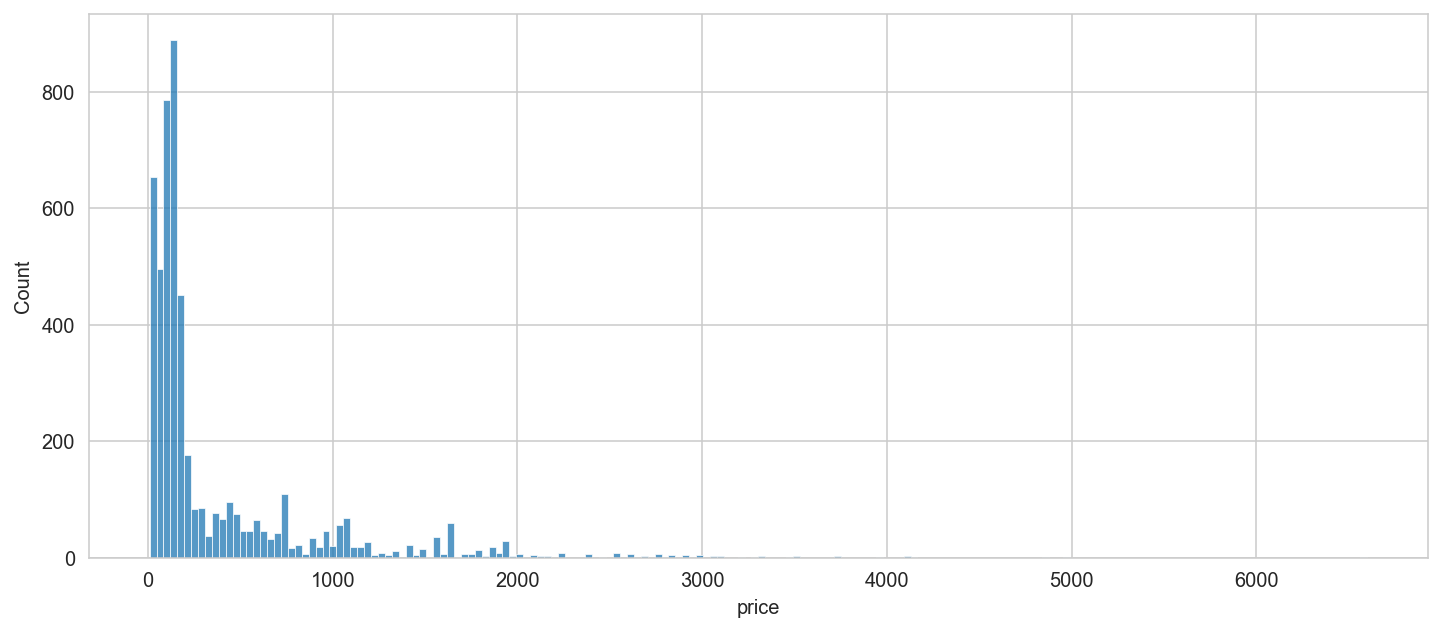

In [69]:
# проверим на нормальность распределение средних
plt.figure(figsize=(12,5))
sns.histplot(hypo_second.query('cluster_km == 0')['price'])
plt.show()

In [70]:
# тест Шапиро-Уилка на нормальное распределение
# H0 гипотеза что данные распределены нормально при p > 0,05
stat, p = shapiro(hypo_second.query('cluster_km == 0')['price'])  # data - ваш набор данных
print(f"Статистика теста: {stat}, p-значение: {p}")

Статистика теста: 0.6244054436683655, p-значение: 0.0


Ругается на большую выборку (N > 5000), распределение у нас не нормальное, поэтому также применяем тест Критерий Манна-Уитни (Mann-Whitney U Test)

In [71]:
# переберем все комбинации кластеров через функцию:
p_values = []
print('Множественная проверка гипотез для параметра цена 1 товара (price) для всех Кластеров покупателей: \n')
for cluster_pair in clusters_combo:
    cluster_1, cluster_2 = cluster_pair
    mw(hypo_second, 'price', cluster_1, cluster_2)
    p_values.append(p_value)

# Извлечение значений p-value из массивов NumPy
p_values = [p[0] for p in p_values]  
#print('Все значения p_value:', p_values)

# Коррекция уровня значимости с использованием метода Шидака
print('\nКоррекция уровня значимости с использованием метода Шидака:')
# Исходный уровень статистической значимости
alpha = 0.05
n_tests = len(p_values)
alpha_shid = 1 - (1 - alpha) ** (1 / n_tests)
print('Количество тестов:', n_tests,
     '\nСкорректированный уровень значимости alpha_shid:', round(alpha_shid, 4),
     '\nСравнение и переверка всех p_value с скорректированным alpha_shid:')
# Вывод результата
for p_value in p_values:
    print('\np_value:', p_value, 'vs alpha_shid:', alpha_shid)
    if p_value < alpha_shid:
        print('Отклонить нулевую гипотезу')
    else:
        print('Не отклонять нулевую гипотезу')

Множественная проверка гипотез для параметра цена 1 товара (price) для всех Кластеров покупателей: 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 1: 

Средний параметр покупателя Кластера 0: 366.826
Средний параметр покупателя Кластера 1: 2925.124
Статистика критерия Манна-Уитни: [223979.]
p-value: [2.1117386e-107]
Отвергаем нулевую гипотезу: разница статистически значима
------------------------------------------------------------ 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 2: 

Средний параметр покупателя Кластера 0: 366.826
Средний параметр покупателя Кластера 2: 932.846
Статистика критерия Манна-Уитни: [222606.]
p-value: [4.44455478e-15]
Отвергаем нулевую гипотезу: разница статистически значима
------------------------------------------------------------ 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 3: 

Средний параметр покупателя Кластера 0: 366.826
Средний параметр покупателя Кластера 3: 109.450
Статистика критерия Манна-Уитни: [77111.]
p-val

На имеющихся данных, на скорректированном уровне значимости с использованием метода Шидака 0.0085 есть основания отвергнуть все нулевые гипотезы о равенстве цена 1 товара (price) покупателей в пользу альтернативных гипотез. Вывод: цены 1 товара (price) покупателей различаются с статистической точки зрения, тоесть все кластеры пользователей разбиты корректно.

###  5.3 Проверка гипотез на различие между средним Кол-вом товаров в заказе по кластерам (все комбинации)
```
Зададим гипотезы для комбинаций кластеров [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
Общие:
H_0 (нулевая гипотеза): Нет различий между средней ценой 1 товара сегментов/кластеров покупателей (x, y)
H_A (альтер-ая гипотеза): Есть различия между средней ценой 1 товара сегментов/кластеров покупателей (x, y)
alpha = 0.05 (Исходный уровень статистической значимости)
```

In [72]:
# отфильтруем датафрейм с нужными колонками
hypo_third = (df2.groupby(['order_id', 'cluster_km'], as_index=False)
              .agg(quantity_mean=('quantity', 'mean'))
             )

# посчитаем сколько у нас каждого кластера в датафрейме заказов
hypo_third['cluster_km'].value_counts()

0    3088
1     292
2     126
3      14
Name: cluster_km, dtype: int64

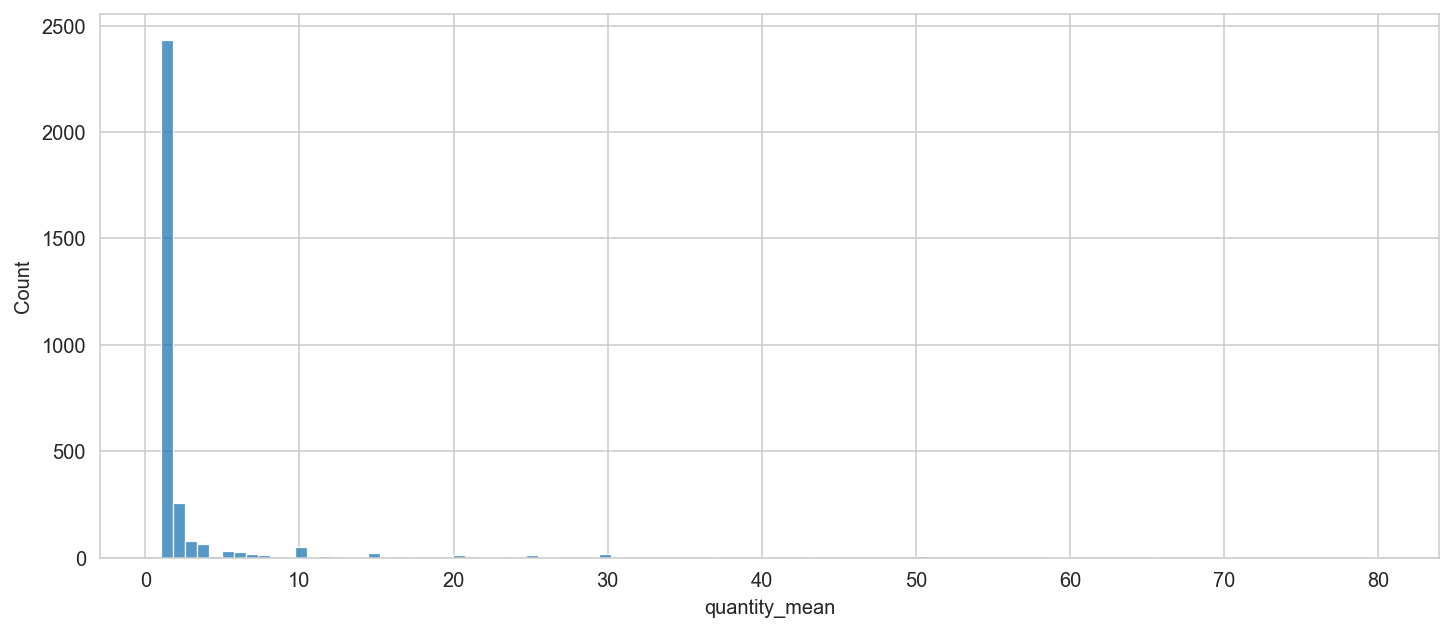

In [73]:
# проверим на нормальность распределение средних
plt.figure(figsize=(12,5))
sns.histplot(hypo_third.query('cluster_km == 0')['quantity_mean'], bins=100)
plt.show()

In [74]:
# тест Шапиро-Уилка на нормальное распределение
# H0 гипотеза что данные распределены нормально при p > 0,05
stat, p = shapiro(hypo_third.query('cluster_km == 0')['quantity_mean'])  # data - ваш набор данных
print(f"Статистика теста: {stat}, p-значение: {p}")

Статистика теста: 0.27594953775405884, p-значение: 0.0


Данные распределены не нормально, поэтому применяем тест Критерий Манна-Уитни (Mann-Whitney U Test)

In [75]:
# переберем все комбинации кластеров через функцию:
p_values = []
print('Множественная проверка гипотез для параметра цена 1 товара (price) для всех Кластеров покупателей: \n')
for cluster_pair in clusters_combo:
    cluster_1, cluster_2 = cluster_pair
    mw(hypo_third, 'quantity_mean', cluster_1, cluster_2)
    p_values.append(p_value)

# Извлечение значений p-value из массивов NumPy
p_values = [p[0] for p in p_values]  
#print('Все значения p_value:', p_values)

# Коррекция уровня значимости с использованием метода Шидака
print('\nКоррекция уровня значимости с использованием метода Шидака:')
# Исходный уровень статистической значимости
alpha = 0.05
n_tests = len(p_values)
alpha_shid = 1 - (1 - alpha) ** (1 / n_tests)
print('Количество тестов:', n_tests,
     '\nСкорректированный уровень значимости alpha_shid:', round(alpha_shid, 4),
     '\nСравнение и переверка всех p_value с скорректированным alpha_shid:')
# Вывод результата
for p_value in p_values:
    print('\np_value:', p_value, 'vs alpha_shid:', alpha_shid)
    if p_value < alpha_shid:
        print('Отклонить нулевую гипотезу')
    else:
        print('Не отклонять нулевую гипотезу')

Множественная проверка гипотез для параметра цена 1 товара (price) для всех Кластеров покупателей: 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 1: 

Средний параметр покупателя Кластера 0: 2.363
Средний параметр покупателя Кластера 1: 1.838
Статистика критерия Манна-Уитни: [500495.]
p-value: [2.42431165e-05]
Отвергаем нулевую гипотезу: разница статистически значима
------------------------------------------------------------ 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 2: 

Средний параметр покупателя Кластера 0: 2.363
Средний параметр покупателя Кластера 2: 2.438
Статистика критерия Манна-Уитни: [195276.5]
p-value: [0.92364523]
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
------------------------------------------------------------ 

ТЕСТ Критерий Манна-Уитни для комбинации кластеров 0 vs 3: 

Средний параметр покупателя Кластера 0: 2.363
Средний параметр покупателя Кластера 3: 143.845
Статистика критерия Манна-Уитни: [71.]
p-val

Только Кластер 0 и 2 не отличаются, остальные комбинации отличаются.
На имеющихся данных, на скорректированном уровне значимости с использованием метода Шидака 0.0085 есть основания отвергнуть все нулевые гипотезы о равенстве среднем Кол-вом товаров в заказе покупателей в пользу альтернативных гипотез. Вывод: среднее Кол-вом товаров в заказе покупателей различаются с статистической точки зрения, тоесть все кластеры пользователей разбиты корректно.

## 6. Вывод

**6.1 Выводы по EDA:**
1. Анализ всех признаков по отдельности:
    * Пиков по датам заказов почти нет, немного есть в марте перед дачным сезоном, есть пик по кол-ву позиций начиная с конца весны с мая, и есть провал в Новый год.
    * Среднее кол-во товаров в 1 заказе - 2,6шт, а медианное(наиболее частое без выбросов) - 1шт. Тоесть как правило люди покупают по 1 товару в заказе.
    * Средняя цена товара - 530 ед., а медианное(наиболее частое без выбросов) - 150ед.
    * Средняя цена заказа - 1306ед., а медианное(наиболее частое без выбросов) - 577ед.
    * Средняя кол-во заказов у 1 покупателя - 1,45шт, а медианное(наиболее частое без выбросов) - 1шт. Тоесть большинство покупателей совершает только 1 заказ в этом интернет-магазине, забывают о нем, и не возвращаются. Также стоит учесть, что данные за период 2018.10.01- 2020.01.31 и сезон был только 1, возможно некотоыре вернуться на следующий сезон.
    * Есть серьезный выброс где 1000шт ванутосов проданы за 675 000 ед., это сильно повляет на продажи и среднии значения, он отфильтрован.

2. В топ 10 наименований товаров 9/10 это Пеларгонии, это точно топ серия интернет-магазина. Также популярна сумка-тележка на 4ом месте.
3. Суммарные продажи по месяцам - падают. Надо обратить на это внимание и что то делать.
4. Количество заказов стабильно держиться почти на одном уровне 150-270шт/мес, в последние месяцы стабильно подрос под верхний диапазон ~260шт.
5. Самые популярные категории товаров: Растения, семена - 37,8%, Хозтовары 23,3%, Рассада 11,9%.
6. По сумме продаж 1ое место Хозтовары с большим отрывом (не смотря на то что они на 2ом месте по популярности), Сумки тележки на 2ом месте (хотя по популярности они аж 6-ые, видимо дорогие), Уборка мойка на 3ем (при популярности 4ое место), а Растения всего на 4ом.
7. Из топ продаж категорий сезонность можно наблюдать у: Хозтовары - сложно уловить сезонность (в 2018 возможно реклама начиналась как хоз товаров, возможно 6,10мес, а так +- равномерно в теч. года), Сумки тележки - 12ый пик и 4ый месяца, Уборка и мойка - 2-4 месяца, Рассада -5мес, Растения и семена - 4,5мес закономерно летом, Муляжи 5 и 11мес, Кухонные принадлежности 6,9мес (не учитывая 2018ый).

**6.2 Выводы по кластеризации/сегментации пользователей:**

**Выводы по Кластеризации покупателей:**
* **Кластер 0 - Основные клиенты** (90% всех клиентов, 60% всех продаж), в среднем 1,4 заказа, заказывают по кол-ву немного 2,7шт по средней цене. Средний чек ниже среднего. Дает основную сумму продаж интернет-магазину 61%.
    * Предпочтительные категории: Растения семена и Рассада 4/5мес, Хозтовары почти всё время(провалы 5,11мес), Уборка/Мойка -2мес. Сезонность в целом - почти равномерно, можно выделить небольшой пик 2-4мес.
    * Рекомендации: На главной странице сайта и в рекламных баннерах стоит обозначить Пеларгонию (в топ10 товаров эта позиция 9/10), Растения и семена, Рассаду, ну и Хозтовары( Видимо люди покупают Растения и семена и дополнительно докупают Хозтовары а они выходят больше по сумме чем растения). Также это увеличит приток основной массы людей на сайт.

* **Кластер 1 - Качественные Премиум-клиенты** (8,3% всех клиентов, 30% всех продаж) , в среднем 1,4 заказа, заказывает по кол-ву немного 1,8 еденицы товара но зато цена единицы этого товара самая дорогая. Равномерное кол-во заказов среди года. По сумме чека на 2ом месте (выше среднего). 
    * Предпочтительные категории: Хозтовары -1,10мес, Сумки тележки - 4,11мес, Уборка/Мойка -4,7мес. 
    * Рекомендации: деласть целевую рассылку со скидками на дорогие товары из категорий Хозтовары и Сумки/тележки.

* **Кластер 2 - Редкие покупатели с большим кол-вом заказов** (126 заказов но это 1 покупатель). Самый низкий средний чек заказа, но средняя стоимость позиции чуть выше среднего. 
    * Предпочтительные категории: Хозтовары -6мес. *(малая выборка).
    * Рекомендации: Можно ему тоже сделать супер предложение или постоянную скидку постоянного покупателя, потому что 126 заказов это очень много, и если он вернеться, то будет постоянно покупать.

* **Кластер 3 - Редкие потенциальные оптовики клиенты** (14шт) заказ 1, но заказывают много по кол-ву дешевых товаров и по итогу выходит у них самая большая сумма чека, но таких покупателей очень мало. 
    * Предпочтительные категории: Хозтовары -6,10мес, Сумки тележки - 12мес, Кух.принадлежности -11мес. 
    * Рекомендации: деласть целевую рассылку со скидками на дешевые товары из категории Хозтовары.

6.3. **Дополнительные рекомендации**

1. Среднее кол-во товаров в 1 заказе - 2,6шт, а медианное(наиболее частое без выбросов) - 1шт. Тоесть как правило люди покупают по 1 товару в заказе и забывают про магазин. Можно сделать систему скидок постоянных покупателей, например через несколько заказов или после определенной суммы даем постоянную скидку. Надо поработать с обратной связью, провести опрос, почему они делают только 1 заказ? Почему именно в вашем магазине?

2. Если добавить в личный кабинет в анкету например: пол, возраст, то в будущем можно настроить более точную кластеризацию и персоональные предложения.

In [76]:
# # экспорт очищенных данных для дашборда:

# # полный дф
# df2.to_csv('df2_main.csv', index = False)

# # сагрегированный по заказам
# df2_quantity_2.to_csv('df2_quantity_2_order_price.csv', index = False)

# # сагрегированный по пользователям
# df2_quantity_3.to_csv('df2_quantity_3_customer_order_count.csv', index = False)